# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1346292516_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1262869688_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/426019904_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/314411620_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/855700733_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/324112183_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using 

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1346292516_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


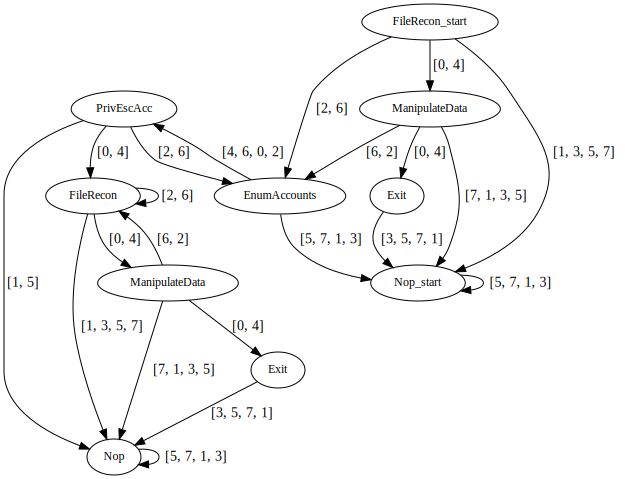

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1262869688_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
5:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


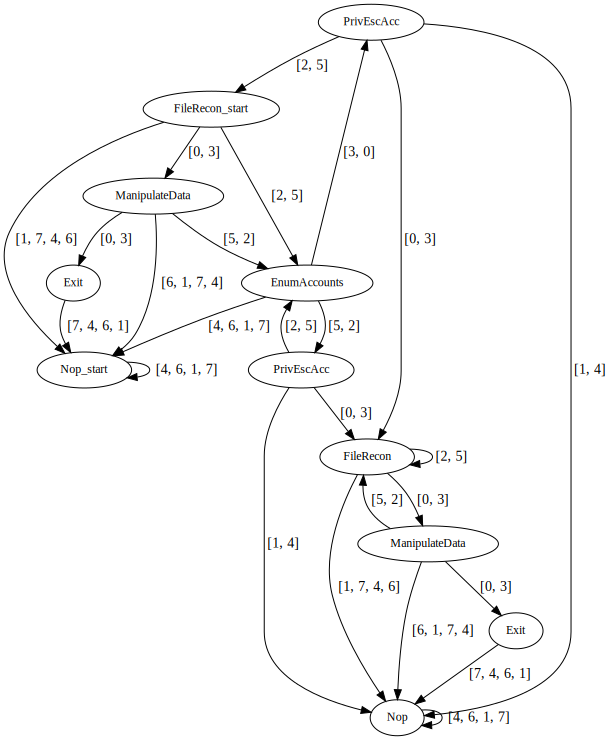

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/426019904_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


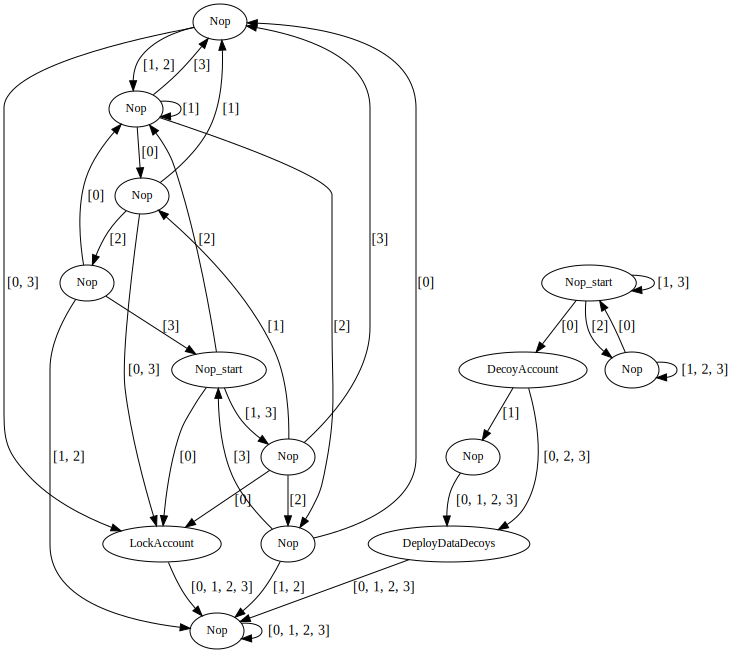

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/314411620_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


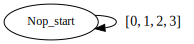

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/855700733_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]


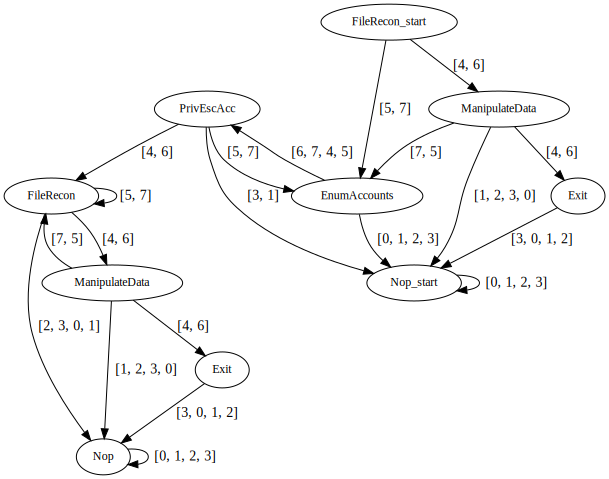

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/324112183_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


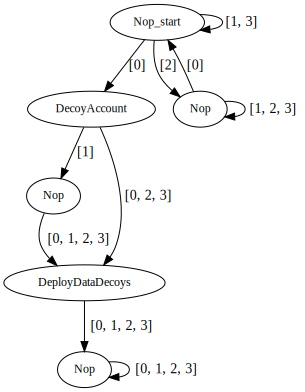

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

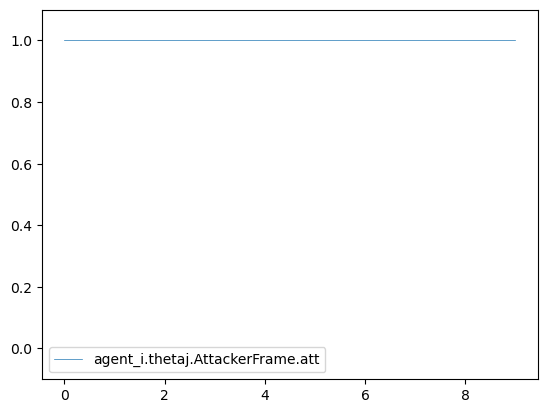

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.459308                        0.540692   
3                         0.458427                        0.541573   
4                         0.481078                        0.518922   
5                         0.481068                        0.518932   
6                         0.481068                        0.518932   
7                         0.481068                        0.518932   
8                         0.481068                        0.518932   
9                         0.481068                        0.518932   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

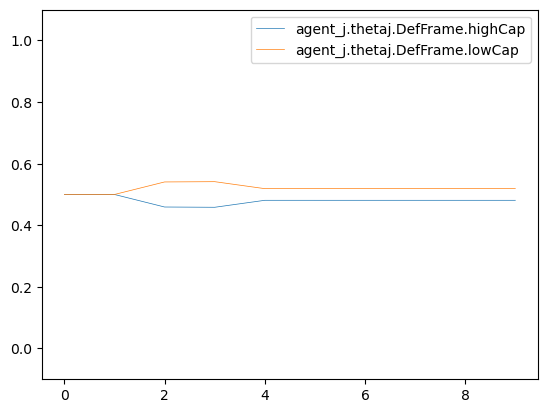

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

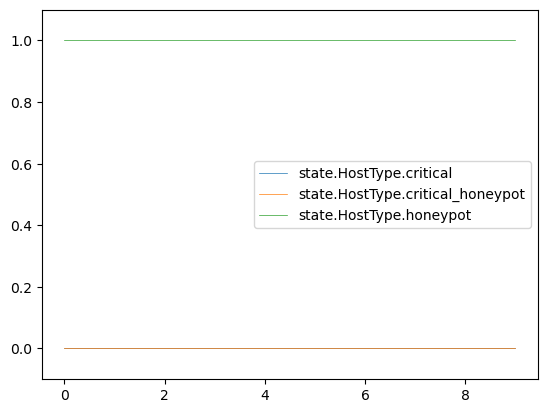

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

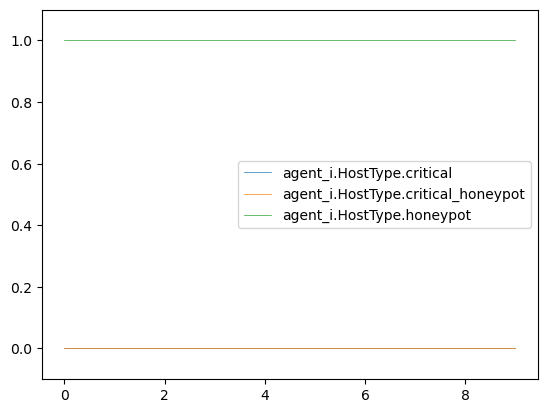

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.086417                                 0.0   
3                   0.084928                                 0.0   
4                   0.037890                                 0.0   
5                   0.037873                                 0.0   
6                   0.037873                                 0.0   
7                   0.037873                                 0.0   
8                   0.037873                                 0.0   
9                   0.037873                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.700000    EnumAccounts      DecoyAccount   
2                   0.913583      PrivEscAcc  DeployDataDecoys   
3                   0.915072       FileRecon               Nop   
4                   0.962110  ManipulateData               Nop   
5                   0.962127            Exit               Nop   
6                   0.962127             Nop               Nop   
7                   0.962127             Nop               Nop   
8                   0.962127             Nop               Nop   
9                   0.962127             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                         none                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

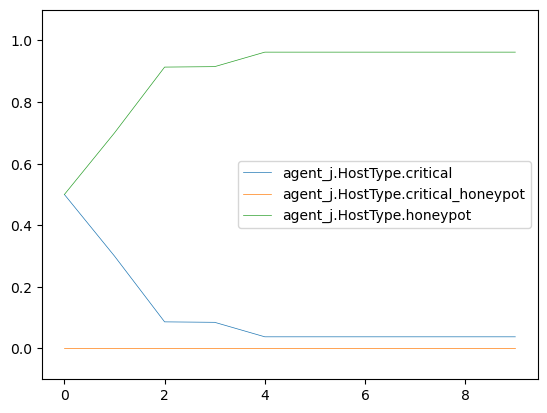

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

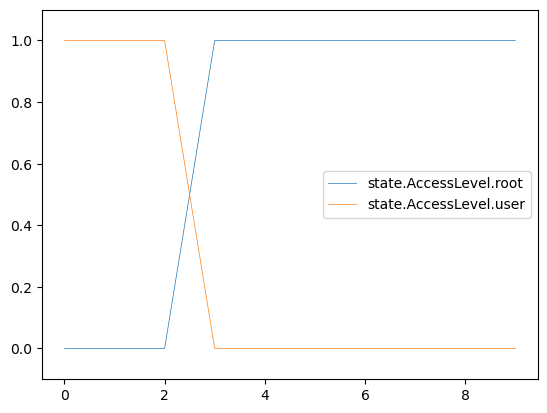

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999997              2.893018e-06               Nop   
6                  1.000000              4.329664e-08               Nop   
7                  1.000000              5.333408e-09               Nop   
8                  1.000000              5.200475e-09               Nop   
9                  1.000000              5.080231e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

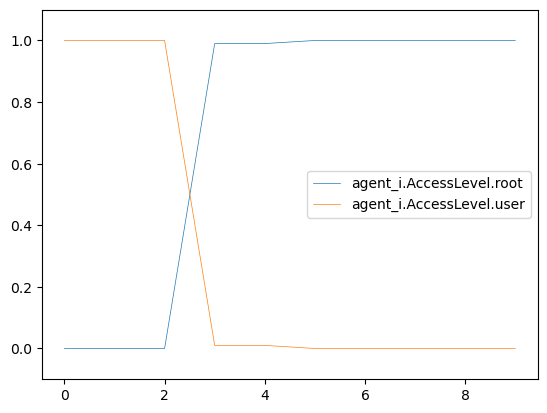

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              1.000000e+00      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              3.806757e-07  ManipulateData   
5                  1.000000              2.667003e-07            Exit   
6                  1.000000              2.667003e-07             Nop   
7                  1.000000              2.667002e-07             Nop   
8                  1.000000              2.667003e-07             Nop   
9                  1.000000              2.667003e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

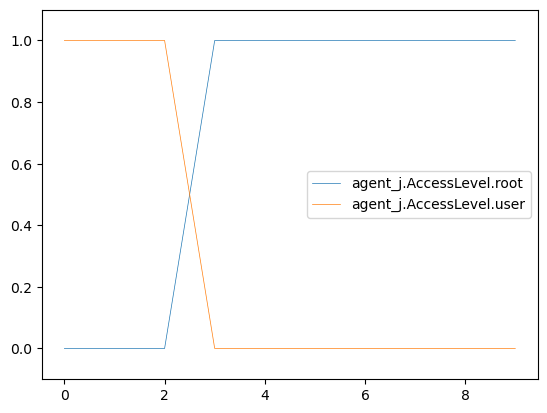

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

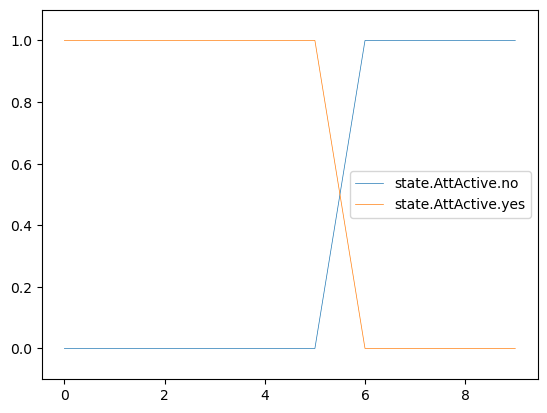

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          3.556729e-09           1.000000e+00               Nop   
6          9.995813e-01           4.186074e-04               Nop   
7          9.999951e-01           4.894352e-06               Nop   
8          9.999952e-01           4.790585e-06               Nop   
9          1.000000e+00           1.345023e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

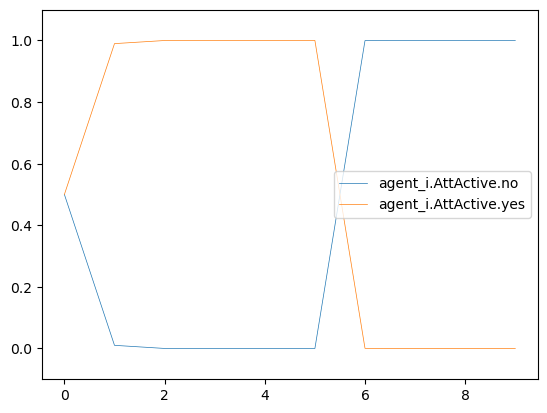

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

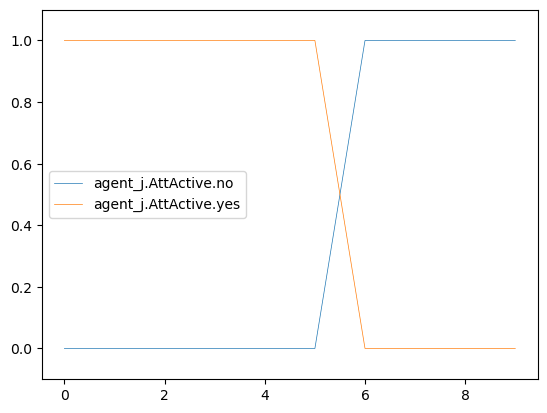

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

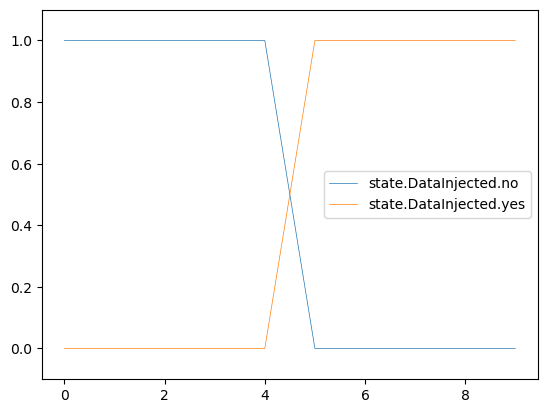

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.000397                  0.999603               Nop   
7                 0.000029                  0.999971               Nop   
8                 0.000028                  0.999972               Nop   
9                 0.000028                  0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

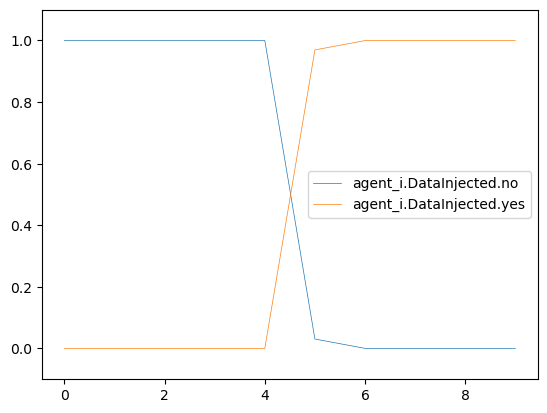

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000025                  0.999974            Exit   
6                 0.000025                  0.999975             Nop   
7                 0.000025                  0.999975             Nop   
8                 0.000025                  0.999974             Nop   
9                 0.000025                  0.999974             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

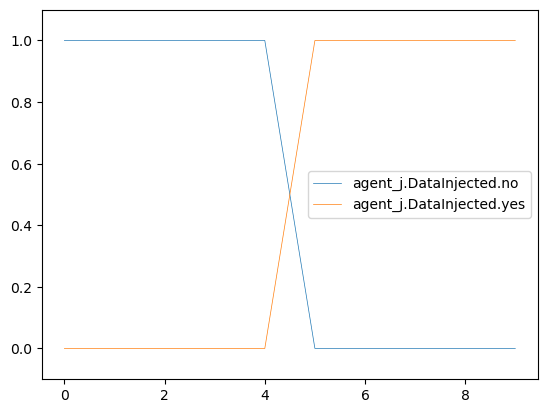

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

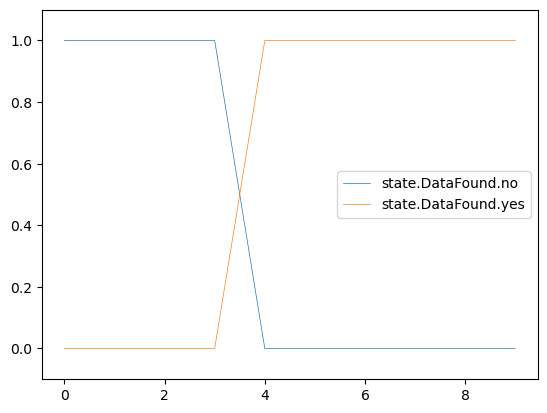

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.000101               0.999899               Nop   
7              0.000028               0.999972               Nop   
8              0.000028               0.999972               Nop   
9              0.000028               0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

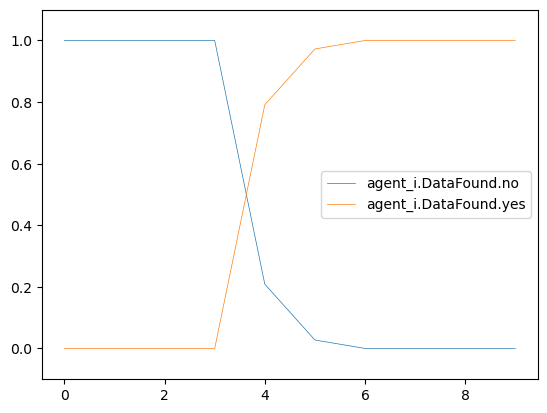

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.931035               0.068966    EnumAccounts   
2              0.931034               0.068966      PrivEscAcc   
3              0.931034               0.068966       FileRecon   
4              0.024793               0.975207  ManipulateData   
5              0.000025               0.999974            Exit   
6              0.000025               0.999975             Nop   
7              0.000025               0.999975             Nop   
8              0.000025               0.999974             Nop   
9              0.000025               0.999974             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

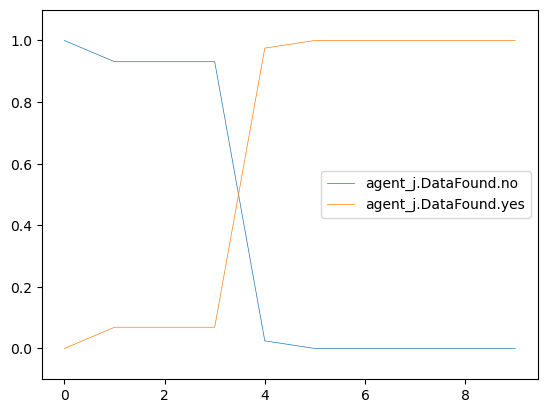

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

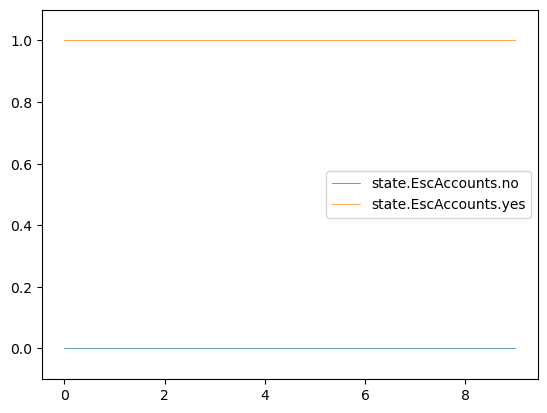

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

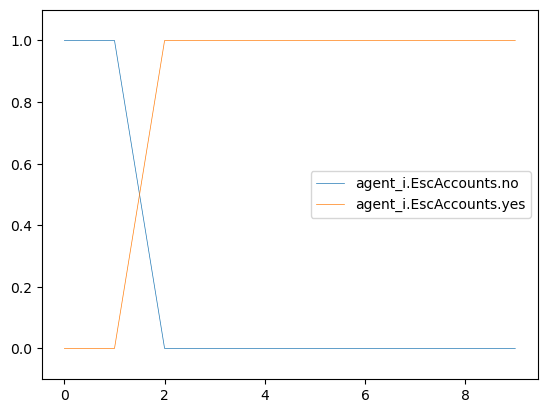

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

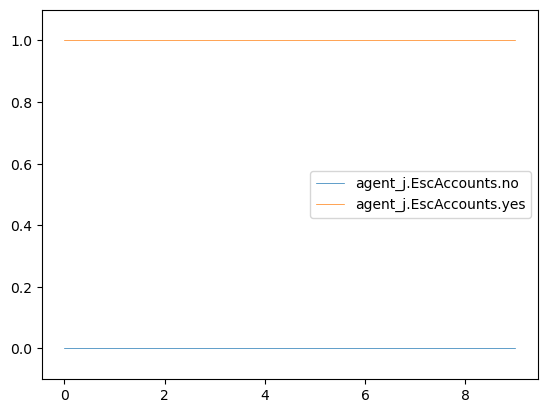

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

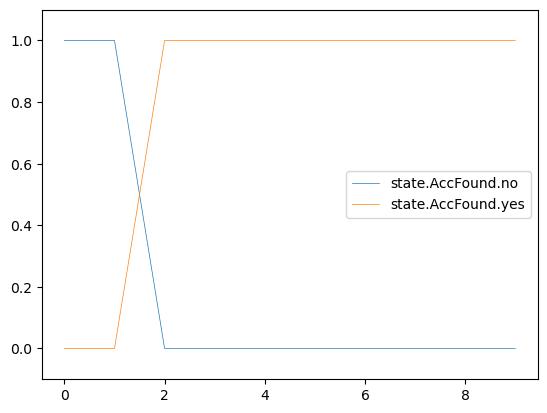

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         2.893001e-06              0.999997               Nop   
6         2.494787e-08              1.000000               Nop   
7         5.333408e-09              1.000000               Nop   
8         5.200357e-09              1.000000               Nop   
9         5.080231e-09              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

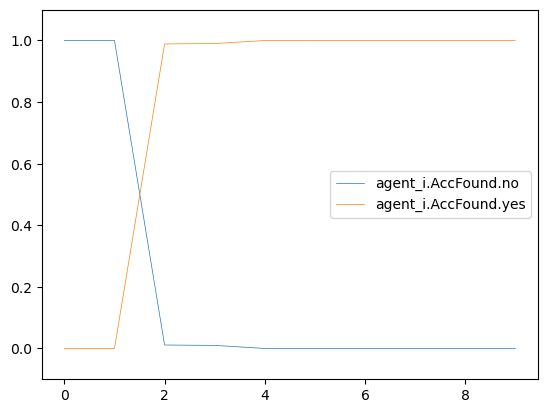

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         3.806757e-07              1.000000  ManipulateData   
5         2.667003e-07              1.000000            Exit   
6         2.667003e-07              1.000000             Nop   
7         2.667002e-07              1.000000             Nop   
8         2.667003e-07              1.000000             Nop   
9         2.667003e-07              1.000000             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

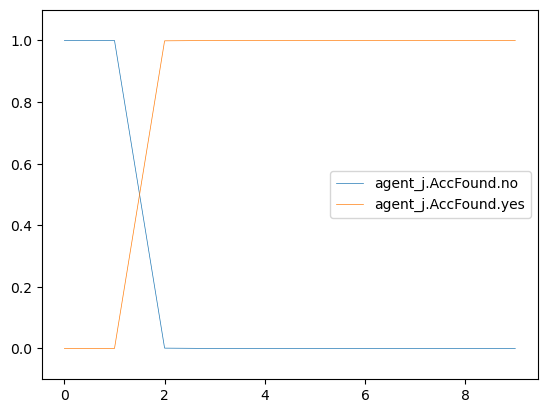

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

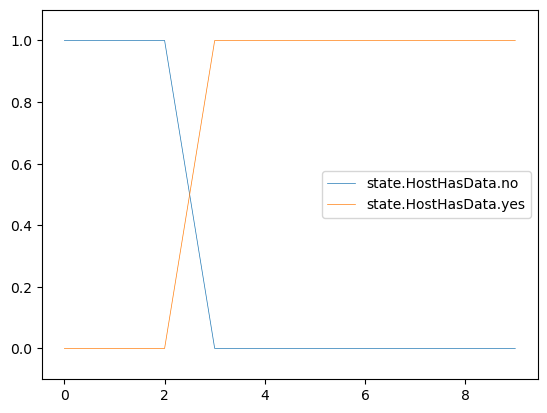

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

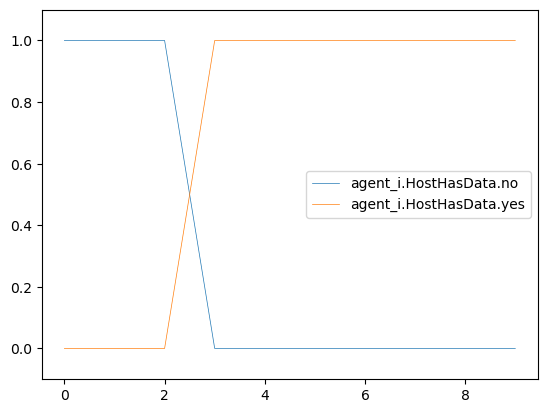

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

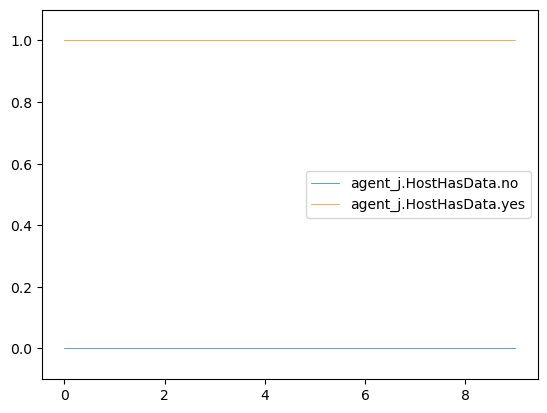

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

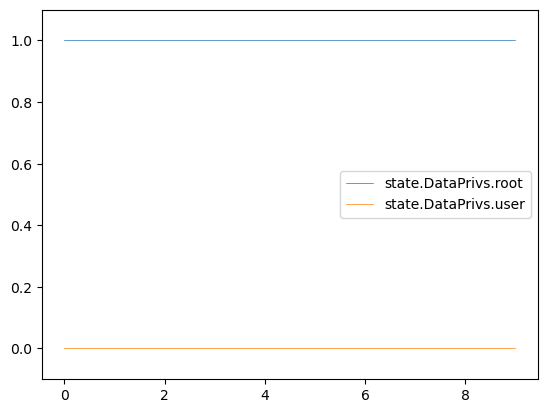

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

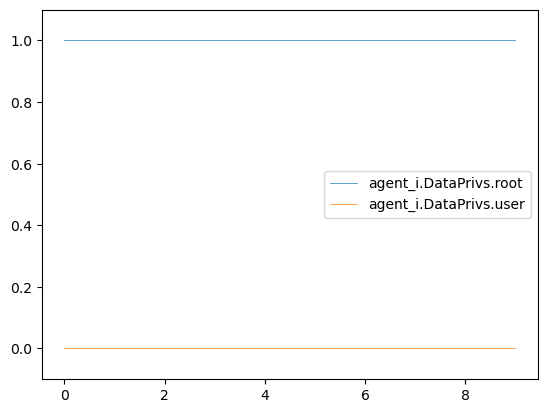

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.775862                0.224138    EnumAccounts   
2                0.775862                0.224138      PrivEscAcc   
3                0.775862                0.224138       FileRecon   
4                0.764463                0.235537  ManipulateData   
5                0.762713                0.237287            Exit   
6                0.762713                0.237287             Nop   
7                0.762713                0.237287             Nop   
8                0.762713                0.237287             Nop   
9                0.762714                0.237287             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

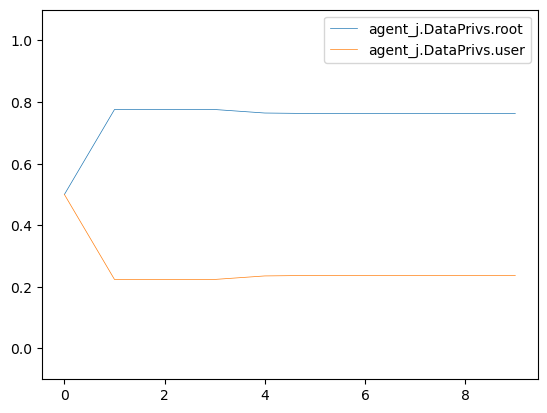

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

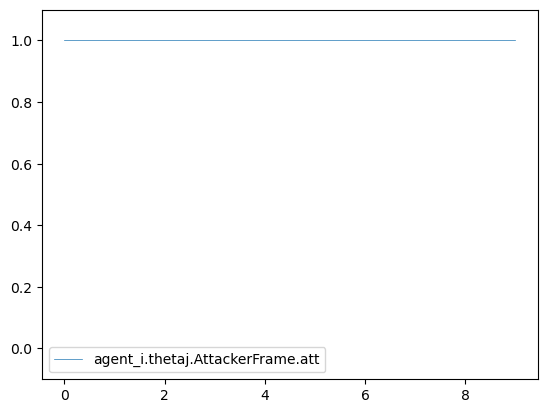

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.411827                        0.588173   
5                         0.411778                        0.588222   
6                         0.411778                        0.588222   
7                         0.411778                        0.588222   
8                         0.411778                        0.588222   
9                         0.411778                        0.588222   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

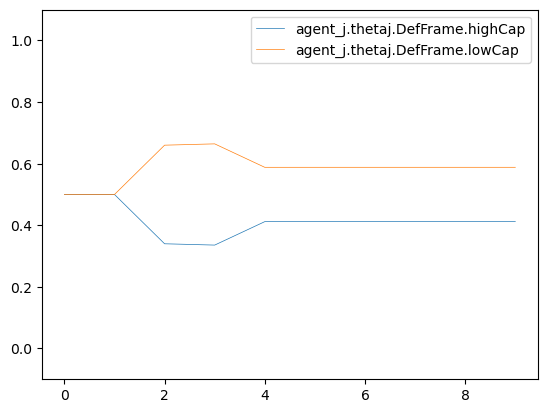

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

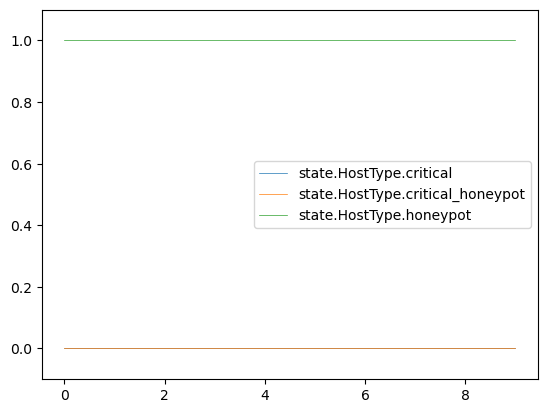

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                       file_write  
6                             none  
7                       file_write  
8                             none  
9                             none

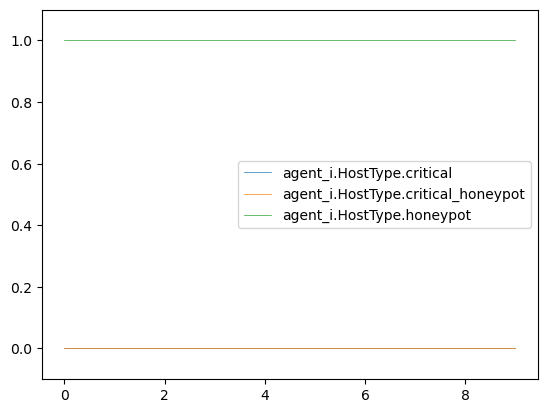

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.176558                                 0.0   
5                   0.176489                                 0.0   
6                   0.176489                                 0.0   
7                   0.176489                                 0.0   
8                   0.176489                                 0.0   
9                   0.176489                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.300000    EnumAccounts      DecoyAccount   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.823442  ManipulateData               Nop   
5                   0.823511            Exit               Nop   
6                   0.823511             Nop               Nop   
7                   0.823511             Nop               Nop   
8                   0.823511             Nop               Nop   
9                   0.823511             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

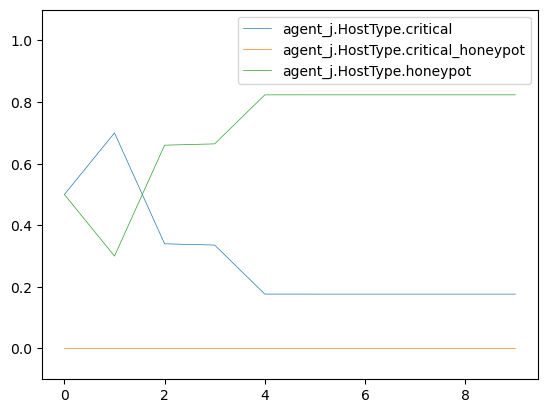

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

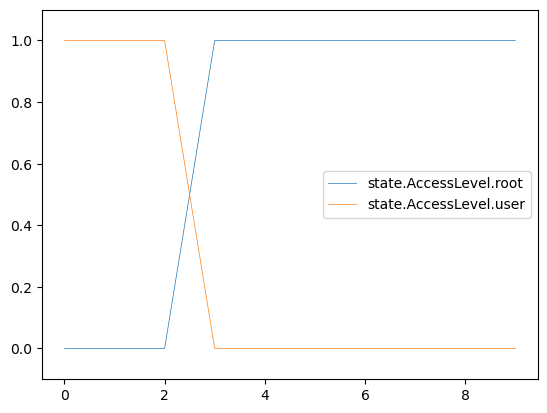

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999997              2.893018e-06               Nop   
6                  1.000000              2.134418e-07               Nop   
7                  1.000000              6.841707e-09               Nop   
8                  1.000000              5.958714e-09               Nop   
9                  1.000000              5.082916e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

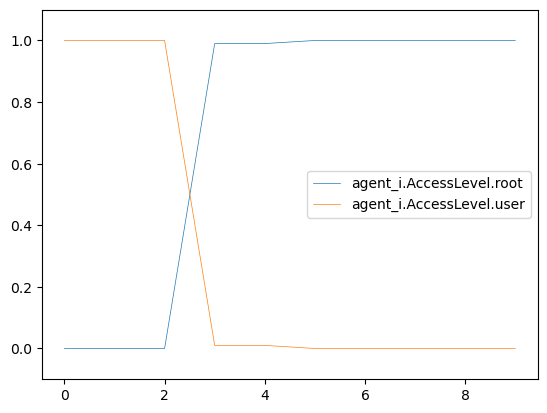

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              1.000000e+00      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              3.806756e-07  ManipulateData   
5                  1.000000              2.667002e-07            Exit   
6                  1.000000              2.667002e-07             Nop   
7                  1.000000              2.667002e-07             Nop   
8                  1.000000              2.667003e-07             Nop   
9                  1.000000              2.667003e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

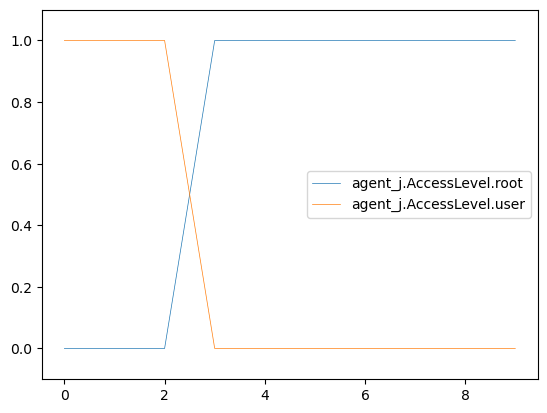

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

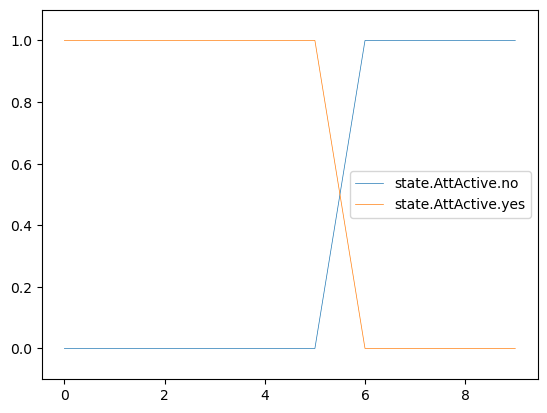

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          3.556729e-09           1.000000e+00               Nop   
6          9.844940e-01           1.550592e-02               Nop   
7          9.999778e-01           2.212908e-05               Nop   
8          9.999695e-01           3.045934e-05               Nop   
9          9.999999e-01           9.747128e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

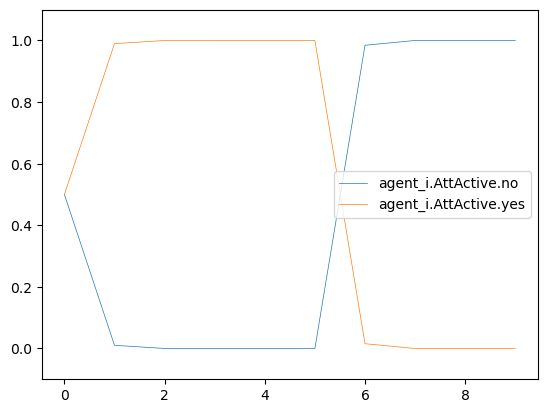

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

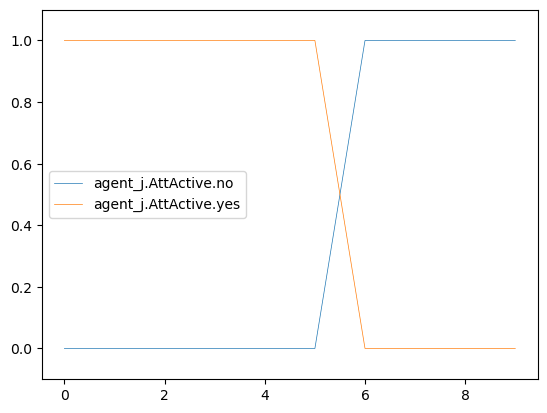

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

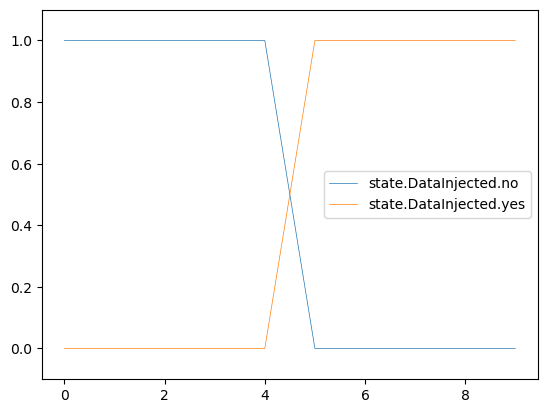

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.001688                  0.998312               Nop   
7                 0.000036                  0.999964               Nop   
8                 0.000028                  0.999972               Nop   
9                 0.000028                  0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

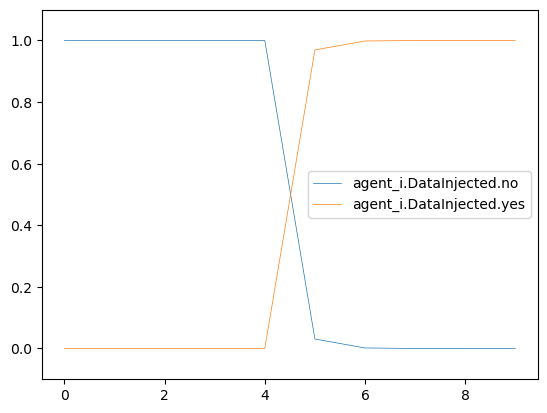

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000025                  0.999975            Exit   
6                 0.000025                  0.999975             Nop   
7                 0.000025                  0.999975             Nop   
8                 0.000025                  0.999975             Nop   
9                 0.000025                  0.999975             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

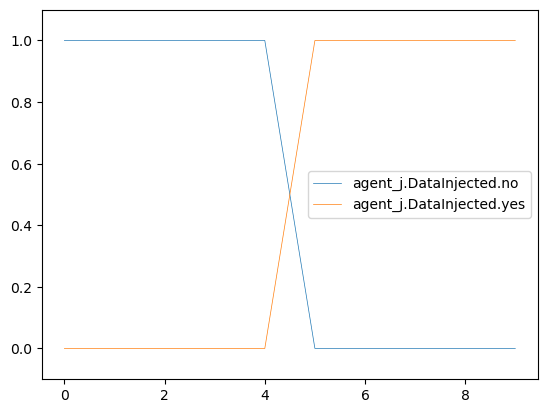

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

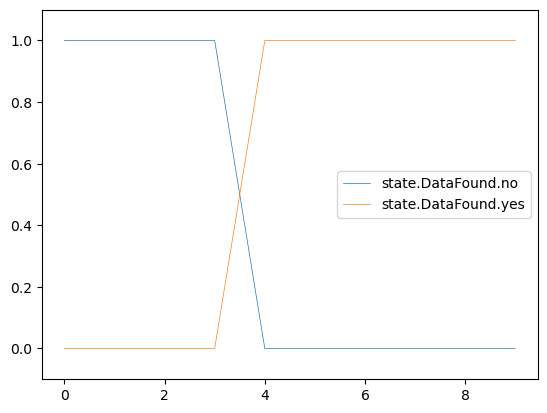

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.000554               0.999446               Nop   
7              0.000029               0.999971               Nop   
8              0.000028               0.999972               Nop   
9              0.000028               0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

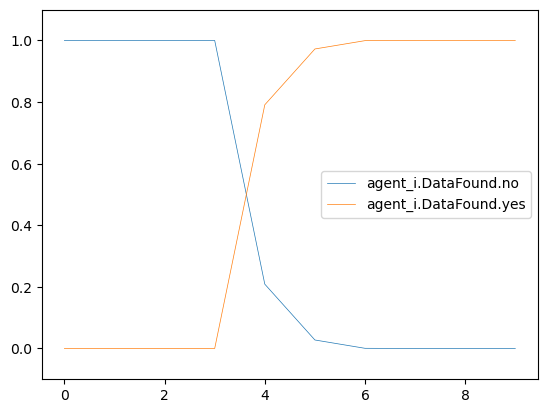

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.931034               0.068966    EnumAccounts   
2              0.931035               0.068966      PrivEscAcc   
3              0.931035               0.068966       FileRecon   
4              0.024793               0.975207  ManipulateData   
5              0.000025               0.999975            Exit   
6              0.000025               0.999975             Nop   
7              0.000025               0.999975             Nop   
8              0.000025               0.999975             Nop   
9              0.000025               0.999975             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

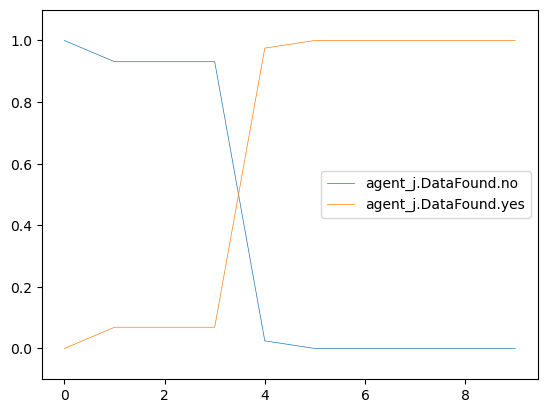

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

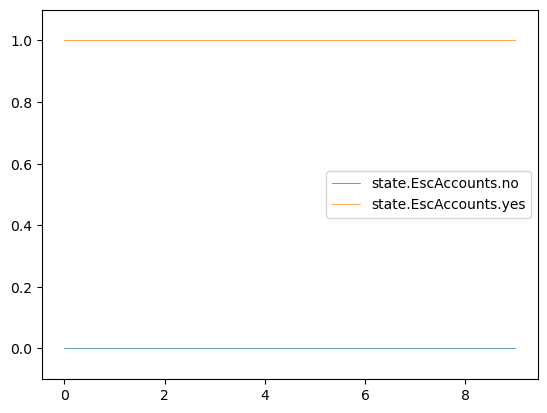

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

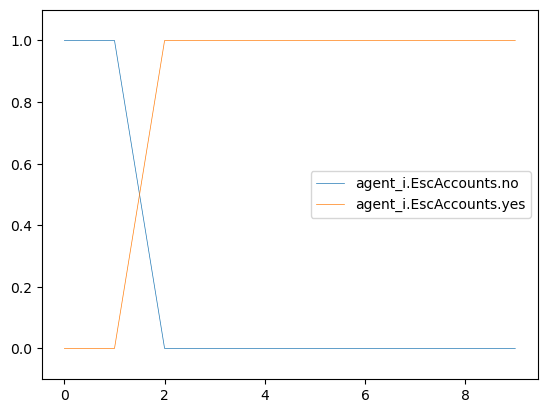

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

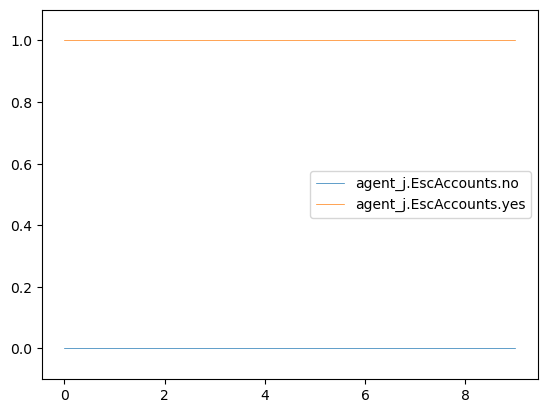

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

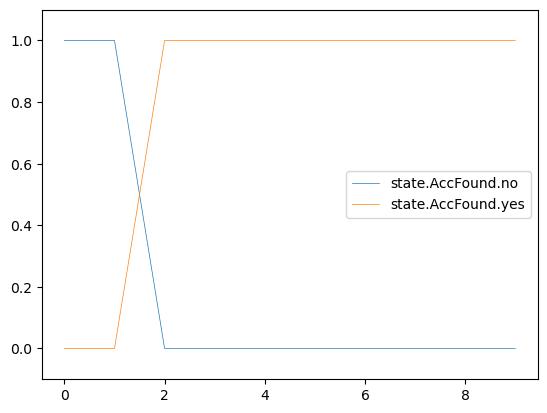

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         2.893001e-06              0.999997               Nop   
6         1.429617e-07              1.000000               Nop   
7         6.841707e-09              1.000000               Nop   
8         5.958261e-09              1.000000               Nop   
9         5.082916e-09              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

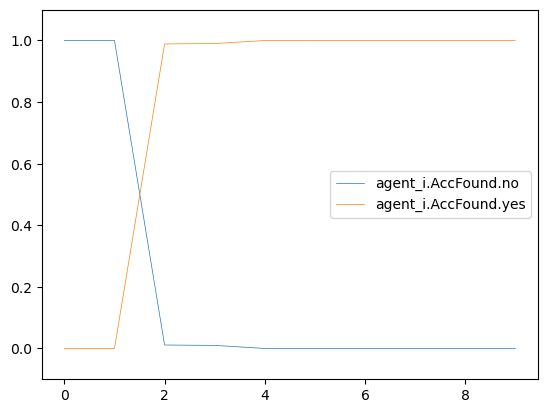

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         3.806756e-07              1.000000  ManipulateData   
5         2.667002e-07              1.000000            Exit   
6         2.667002e-07              1.000000             Nop   
7         2.667002e-07              1.000000             Nop   
8         2.667003e-07              1.000000             Nop   
9         2.667003e-07              1.000000             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

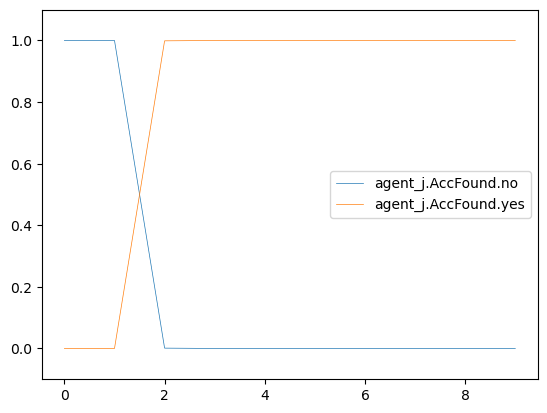

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

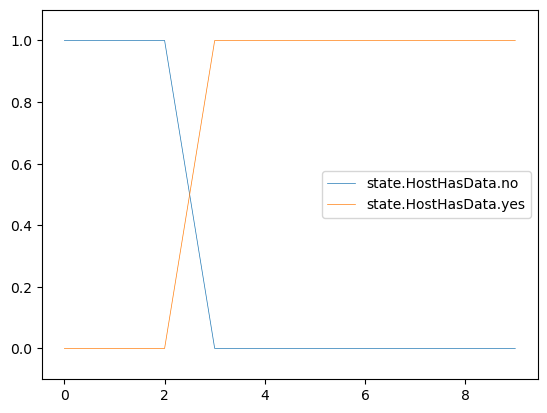

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

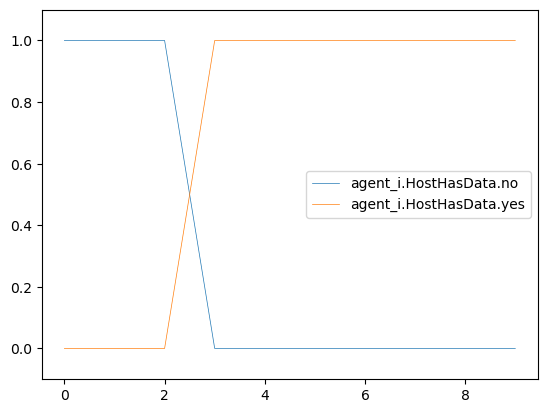

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

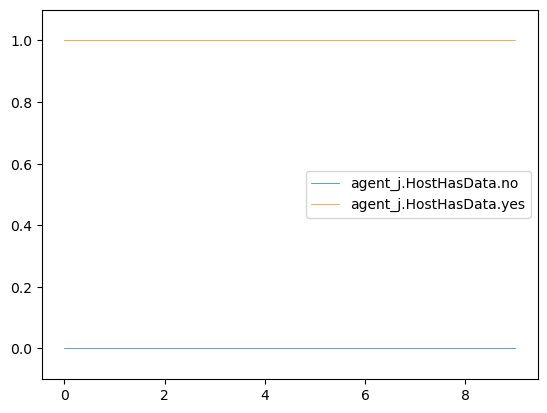

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

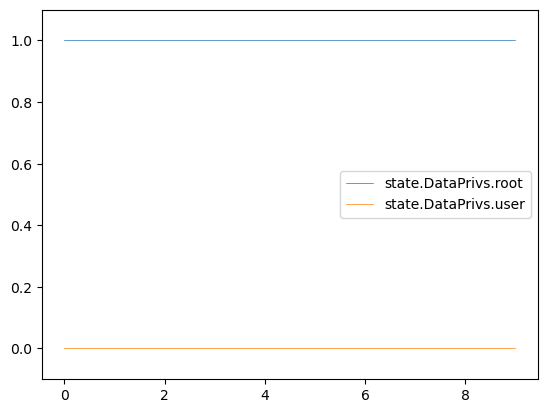

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

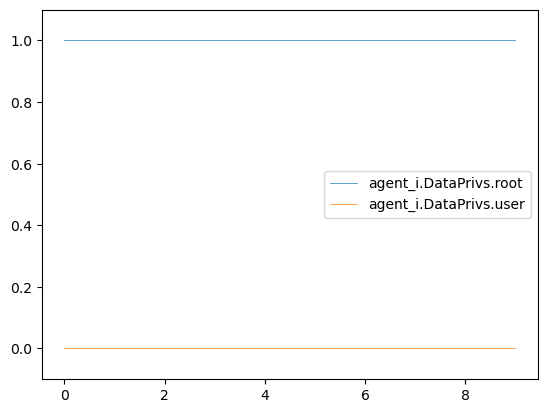

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.775862                0.224138    EnumAccounts   
2                0.775862                0.224138      PrivEscAcc   
3                0.775862                0.224138       FileRecon   
4                0.764463                0.235537  ManipulateData   
5                0.762713                0.237287            Exit   
6                0.762713                0.237287             Nop   
7                0.762713                0.237287             Nop   
8                0.762713                0.237287             Nop   
9                0.762714                0.237287             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

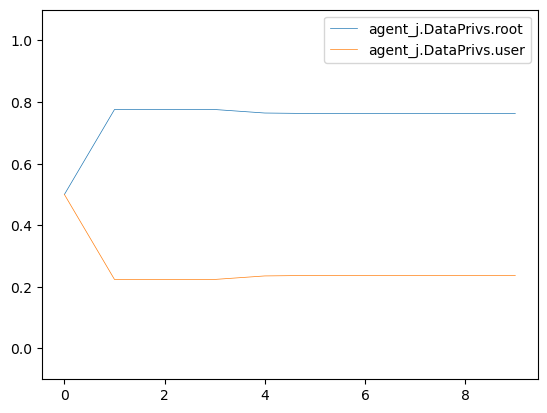

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

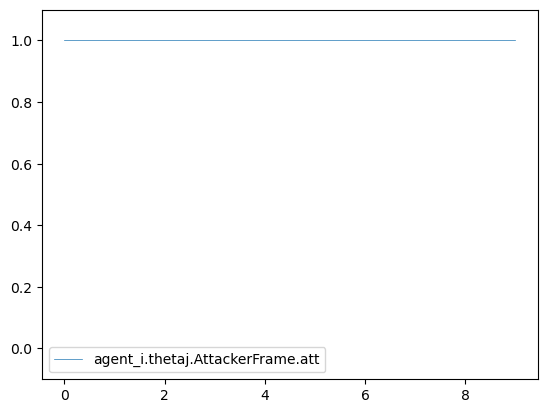

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.411827                        0.588173   
5                         0.411778                        0.588222   
6                         0.411778                        0.588222   
7                         0.411778                        0.588222   
8                         0.411778                        0.588222   
9                         0.411778                        0.588222   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                         none                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

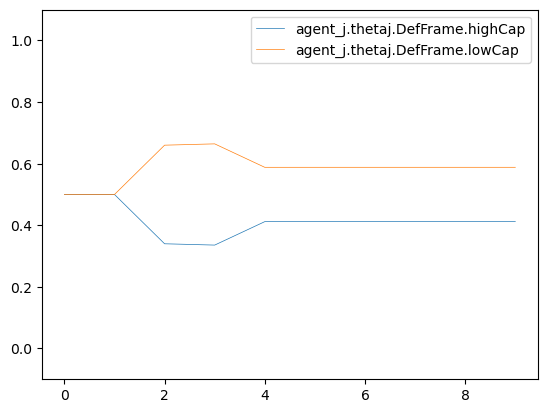

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

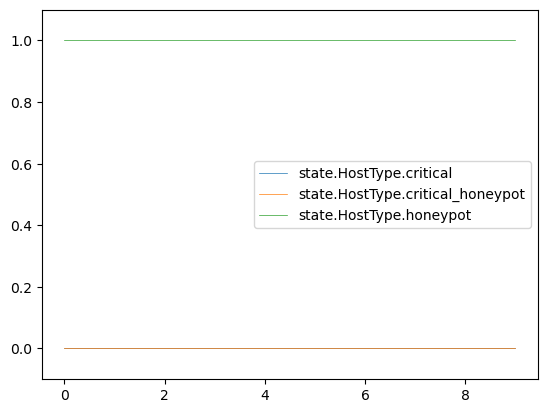

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                        file_enum

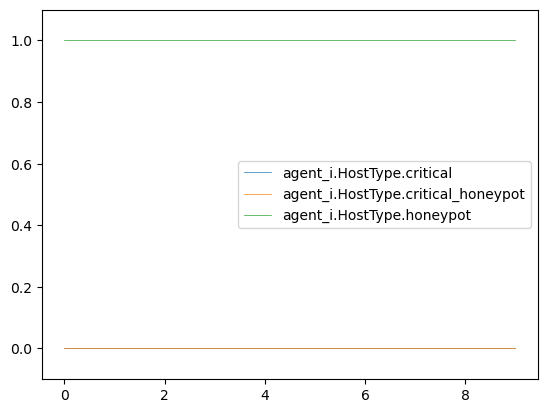

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.176558                                 0.0   
5                   0.176489                                 0.0   
6                   0.176489                                 0.0   
7                   0.176489                                 0.0   
8                   0.176489                                 0.0   
9                   0.176489                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.300000    EnumAccounts      DecoyAccount   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.823442  ManipulateData               Nop   
5                   0.823511            Exit               Nop   
6                   0.823511             Nop               Nop   
7                   0.823511             Nop               Nop   
8                   0.823511             Nop               Nop   
9                   0.823511             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                         none                           failure   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

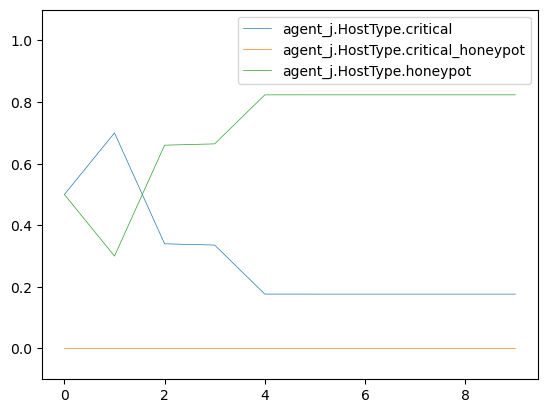

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

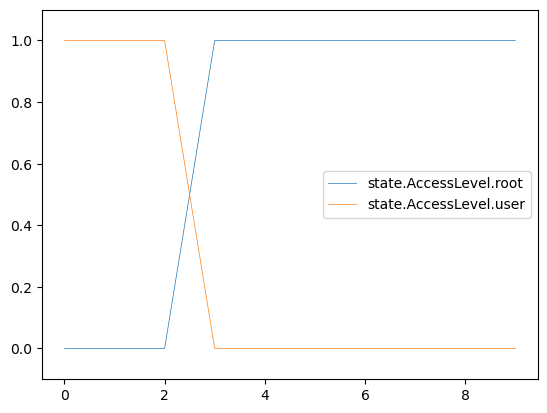

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999997              2.893018e-06               Nop   
6                  1.000000              4.329664e-08               Nop   
7                  1.000000              5.333408e-09               Nop   
8                  1.000000              5.081852e-09               Nop   
9                  1.000000              5.078626e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

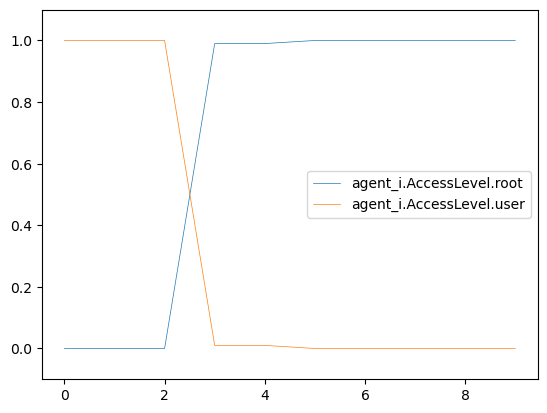

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              1.000000e+00      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              3.806756e-07  ManipulateData   
5                  1.000000              2.667002e-07            Exit   
6                  1.000000              2.667002e-07             Nop   
7                  1.000000              2.667002e-07             Nop   
8                  1.000000              2.667003e-07             Nop   
9                  1.000000              2.667003e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

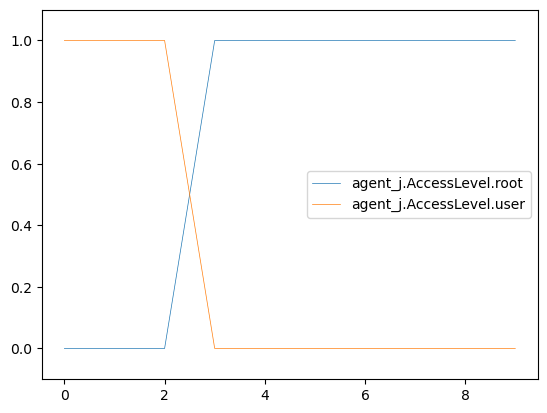

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

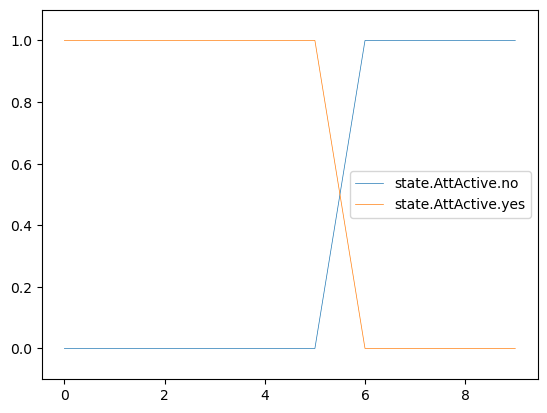

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          3.556729e-09           1.000000e+00               Nop   
6          9.995813e-01           4.186074e-04               Nop   
7          9.999951e-01           4.894352e-06               Nop   
8          1.000000e+00           1.719981e-08               Nop   
9          1.000000e+00           6.171304e-11               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

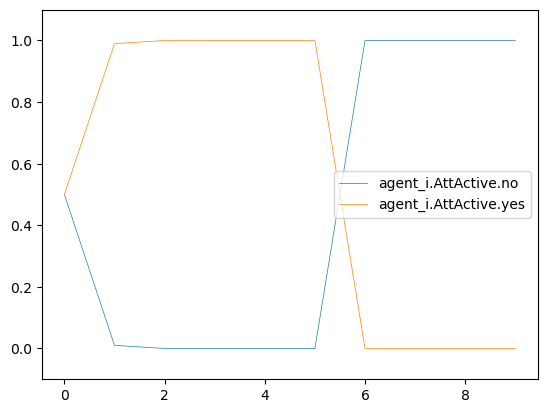

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

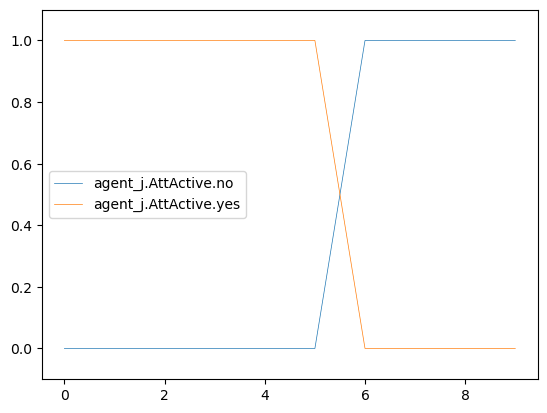

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

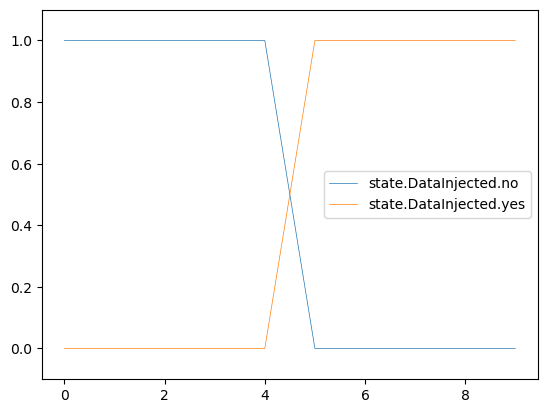

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.000397                  0.999603               Nop   
7                 0.000029                  0.999971               Nop   
8                 0.000028                  0.999972               Nop   
9                 0.000028                  0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

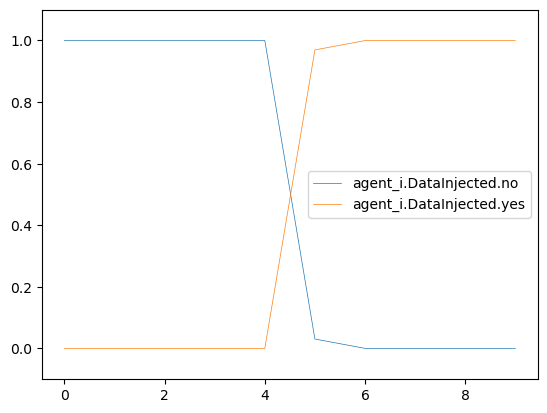

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000025                  0.999975            Exit   
6                 0.000025                  0.999975             Nop   
7                 0.000025                  0.999975             Nop   
8                 0.000025                  0.999975             Nop   
9                 0.000025                  0.999975             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

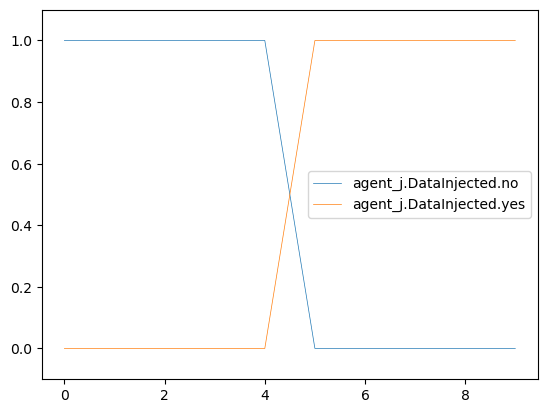

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

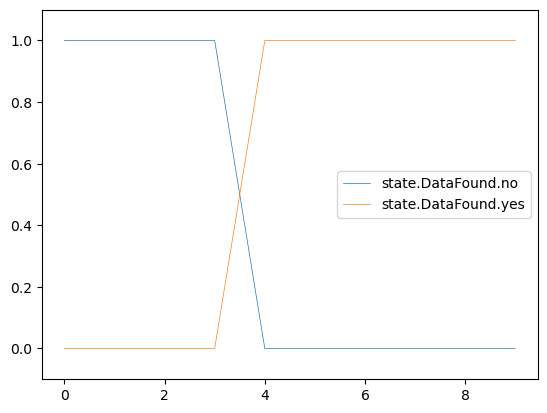

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.000101               0.999899               Nop   
7              0.000028               0.999972               Nop   
8              0.000028               0.999972               Nop   
9              0.000028               0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

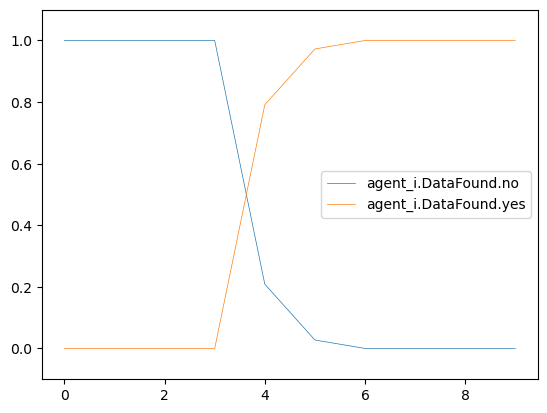

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.931034               0.068966    EnumAccounts   
2              0.931035               0.068966      PrivEscAcc   
3              0.931035               0.068966       FileRecon   
4              0.024793               0.975207  ManipulateData   
5              0.000025               0.999975            Exit   
6              0.000025               0.999975             Nop   
7              0.000025               0.999975             Nop   
8              0.000025               0.999975             Nop   
9              0.000025               0.999975             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

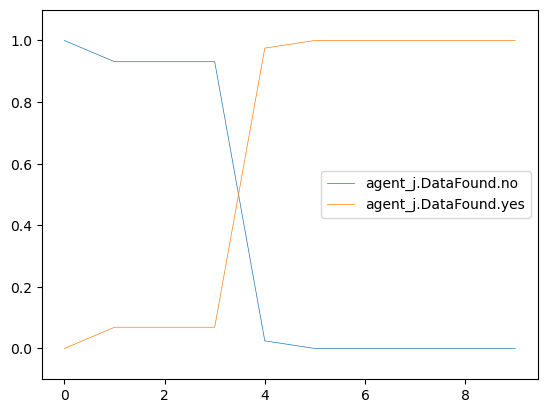

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

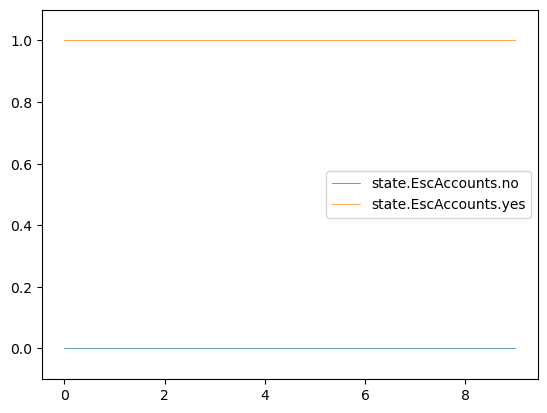

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

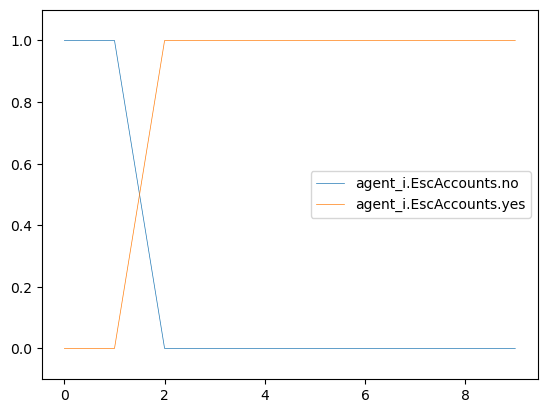

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

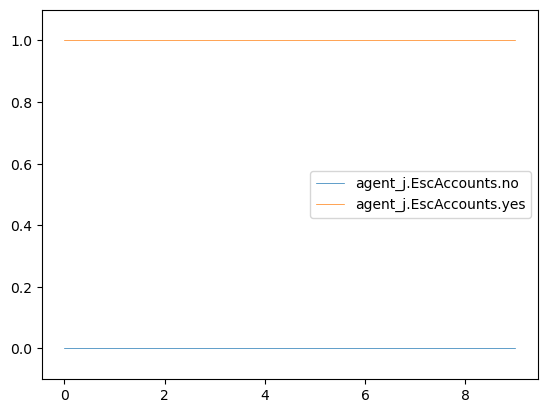

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

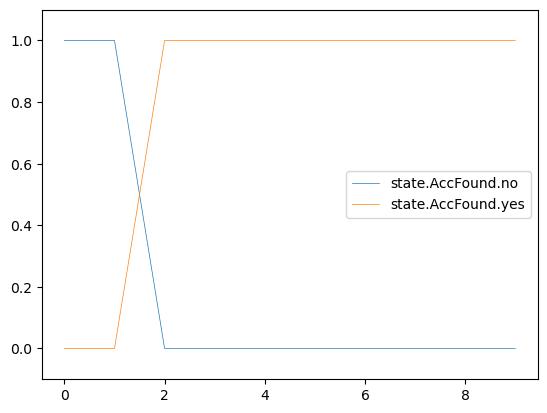

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         2.893001e-06              0.999997               Nop   
6         2.494787e-08              1.000000               Nop   
7         5.333408e-09              1.000000               Nop   
8         5.081822e-09              1.000000               Nop   
9         5.078626e-09              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

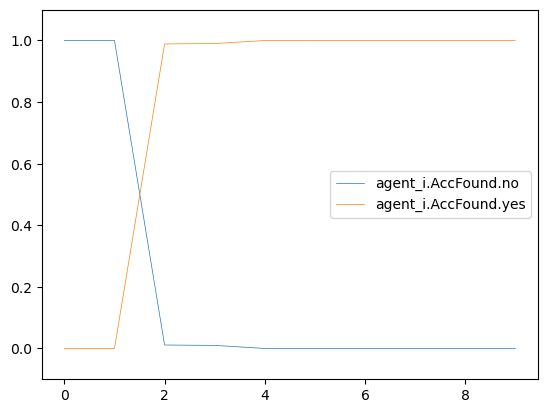

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         3.806756e-07              1.000000  ManipulateData   
5         2.667002e-07              1.000000            Exit   
6         2.667002e-07              1.000000             Nop   
7         2.667002e-07              1.000000             Nop   
8         2.667003e-07              1.000000             Nop   
9         2.667003e-07              1.000000             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

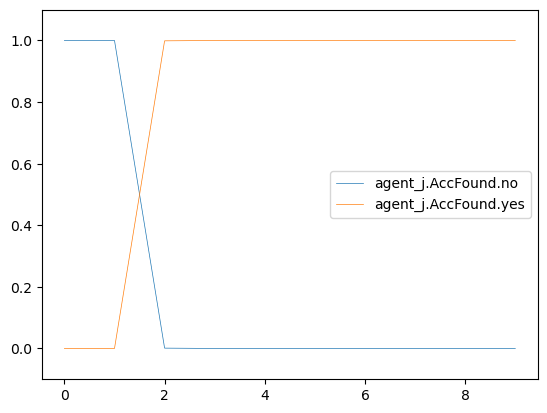

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

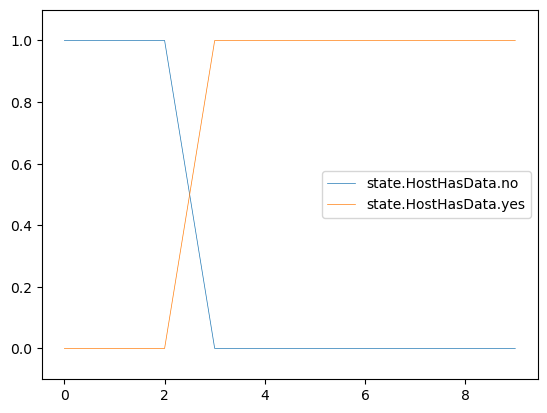

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

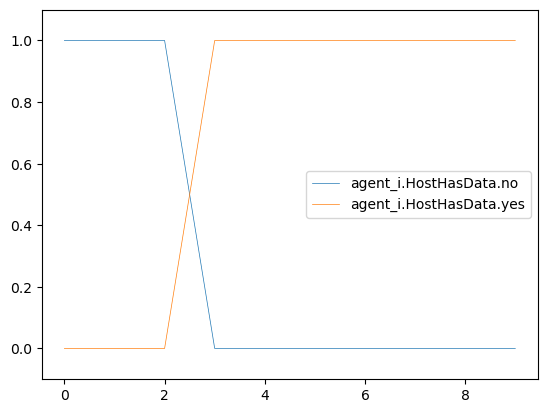

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

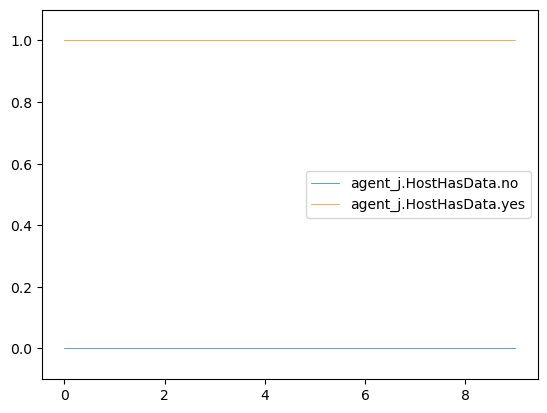

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

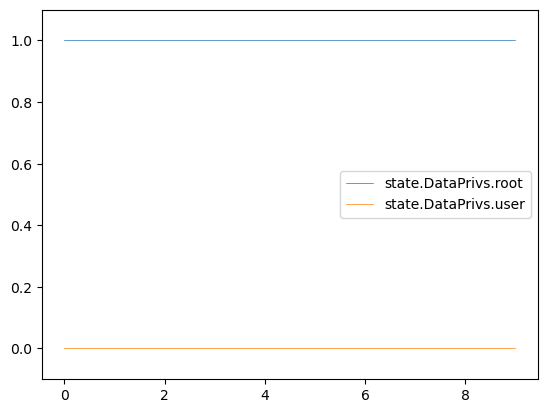

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

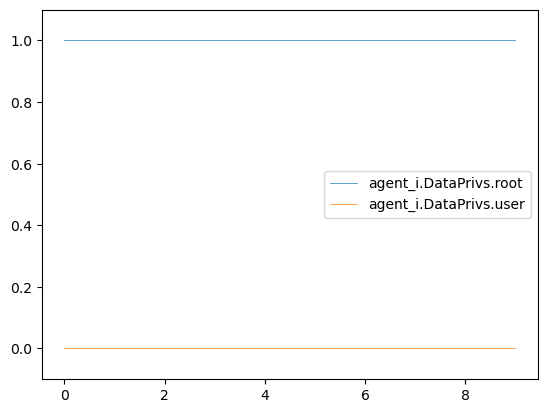

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.775862                0.224138    EnumAccounts   
2                0.775862                0.224138      PrivEscAcc   
3                0.775862                0.224138       FileRecon   
4                0.764463                0.235537  ManipulateData   
5                0.762713                0.237287            Exit   
6                0.762713                0.237287             Nop   
7                0.762713                0.237287             Nop   
8                0.762713                0.237287             Nop   
9                0.762714                0.237287             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

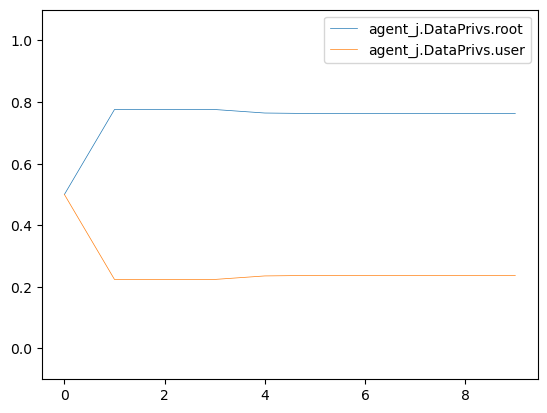

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

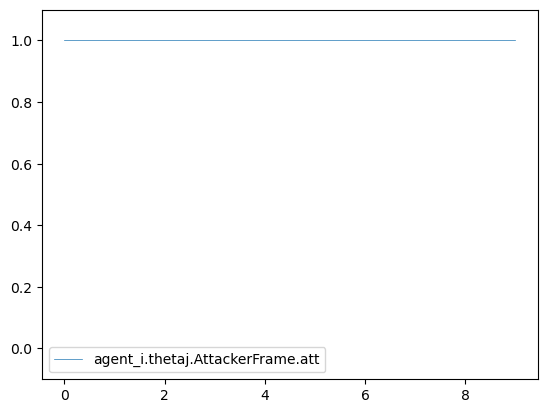

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.152914                        0.847086   
3                         0.140988                        0.859012   
4                         0.231019                        0.768981   
5                         0.230821                        0.769179   
6                         0.230821                        0.769179   
7                         0.230821                        0.769179   
8                         0.230821                        0.769179   
9                         0.230821                        0.769179   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

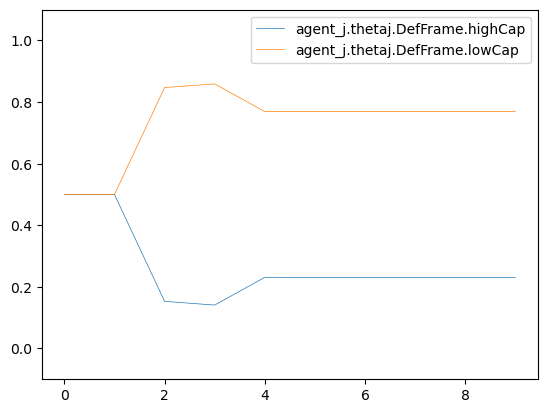

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

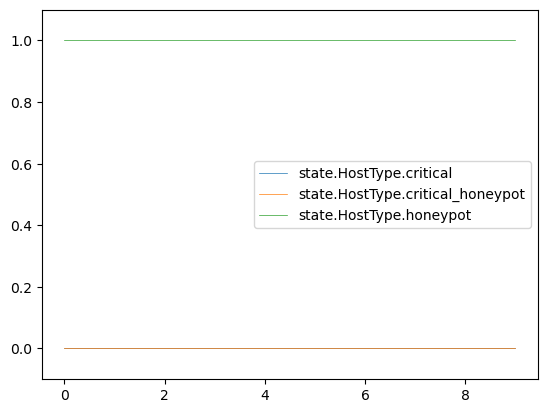

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                       file_write  
9                             none

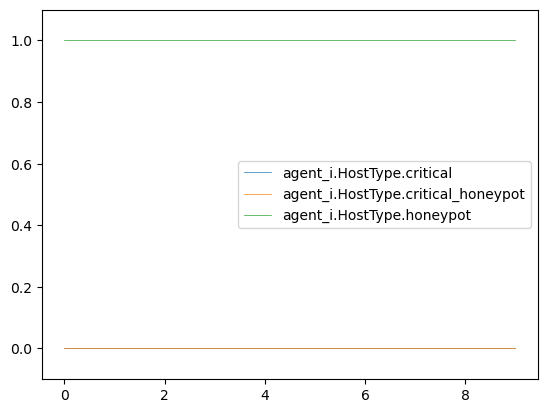

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.737111                                 0.0   
3                   0.733410                                 0.0   
4                   0.538612                                 0.0   
5                   0.538493                                 0.0   
6                   0.538493                                 0.0   
7                   0.538493                                 0.0   
8                   0.538493                                 0.0   
9                   0.538493                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.300000    EnumAccounts      DecoyAccount   
2                   0.262889      PrivEscAcc  DeployDataDecoys   
3                   0.266590       FileRecon               Nop   
4                   0.461388  ManipulateData               Nop   
5                   0.461507            Exit               Nop   
6                   0.461507             Nop               Nop   
7                   0.461507             Nop               Nop   
8                   0.461507             Nop               Nop   
9                   0.461507             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

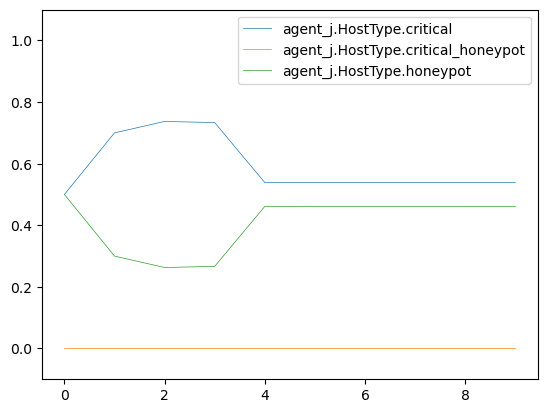

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

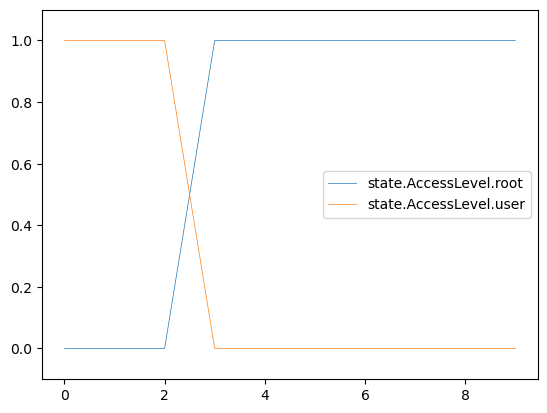

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999997              2.893018e-06               Nop   
6                  1.000000              4.329664e-08               Nop   
7                  1.000000              1.542381e-08               Nop   
8                  1.000000              5.213823e-09               Nop   
9                  1.000000              5.150885e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

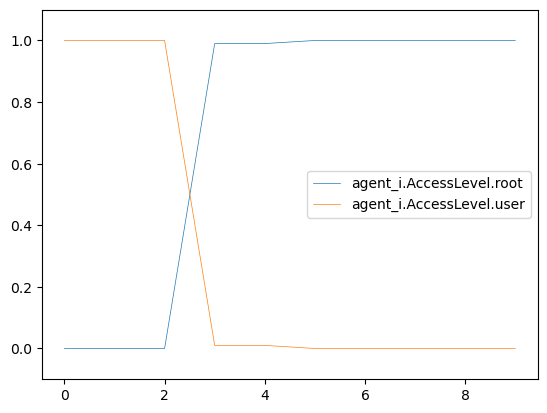

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              1.000000e+00      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  1.000000              3.806757e-07  ManipulateData   
5                  1.000000              2.667003e-07            Exit   
6                  1.000000              2.667002e-07             Nop   
7                  1.000000              2.667003e-07             Nop   
8                  1.000000              2.667003e-07             Nop   
9                  1.000000              2.667002e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

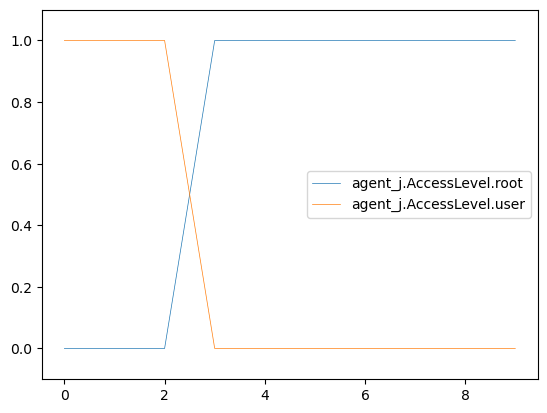

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

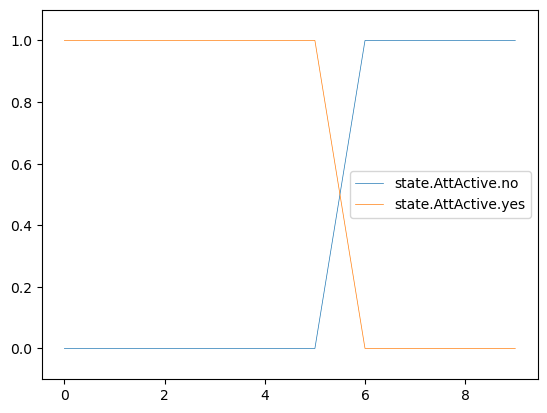

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01      DecoyAccount   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267251e-08           1.000000e+00               Nop   
5          3.556729e-09           1.000000e+00               Nop   
6          9.995813e-01           4.186074e-04               Nop   
7          9.986164e-01           1.383591e-03               Nop   
8          9.999995e-01           5.311995e-07               Nop   
9          9.999983e-01           1.753375e-06               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

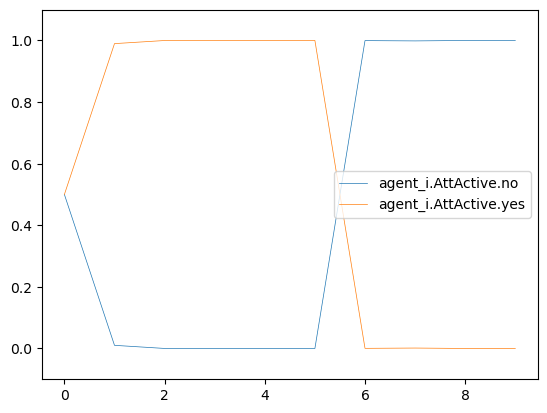

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

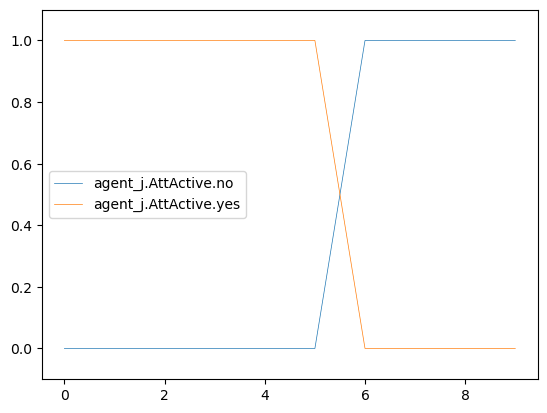

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

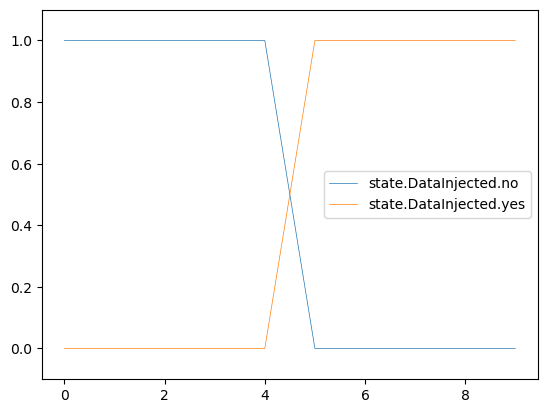

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.030689                  0.969311               Nop   
6                 0.000397                  0.999603               Nop   
7                 0.000068                  0.999932               Nop   
8                 0.000028                  0.999972               Nop   
9                 0.000028                  0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

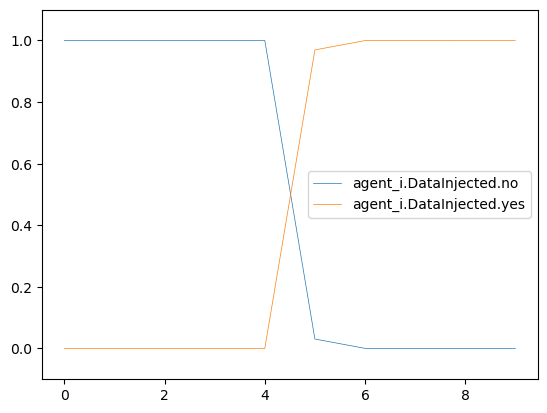

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000025                  0.999974            Exit   
6                 0.000025                  0.999975             Nop   
7                 0.000025                  0.999975             Nop   
8                 0.000025                  0.999975             Nop   
9                 0.000025                  0.999975             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

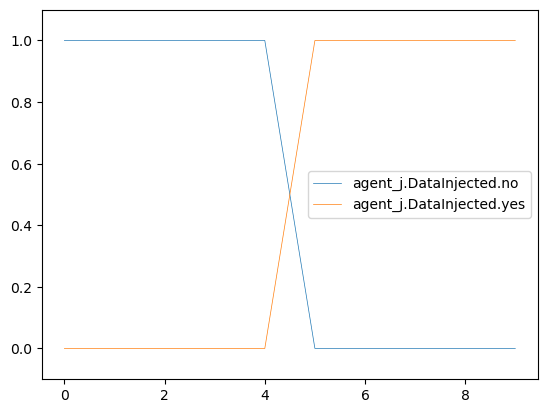

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

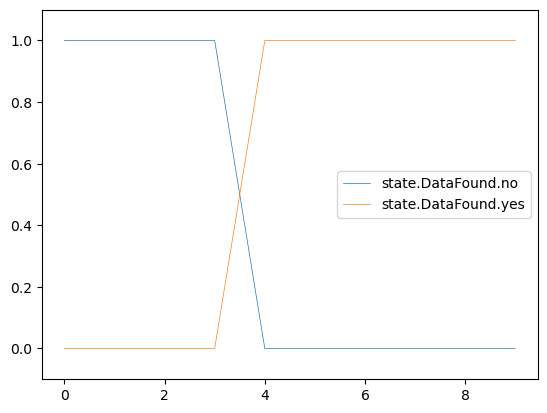

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.027581               0.972419               Nop   
6              0.000101               0.999899               Nop   
7              0.000064               0.999936               Nop   
8              0.000028               0.999972               Nop   
9              0.000028               0.999972               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

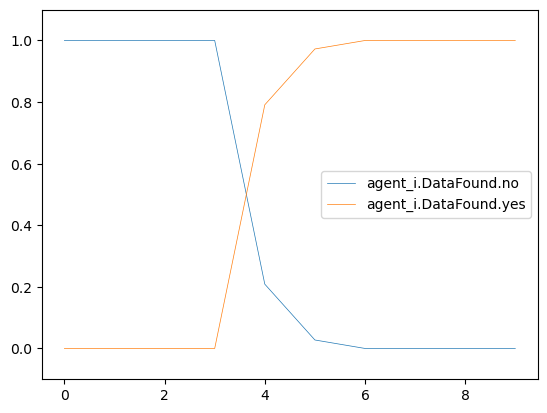

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.931034               0.068966    EnumAccounts   
2              0.931035               0.068966      PrivEscAcc   
3              0.931034               0.068966       FileRecon   
4              0.024794               0.975207  ManipulateData   
5              0.000025               0.999974            Exit   
6              0.000025               0.999975             Nop   
7              0.000025               0.999975             Nop   
8              0.000025               0.999975             Nop   
9              0.000025               0.999975             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

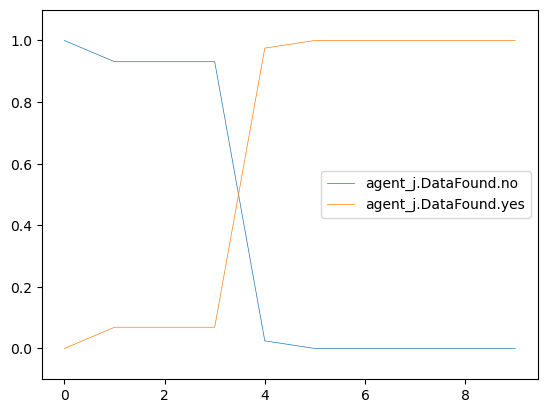

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

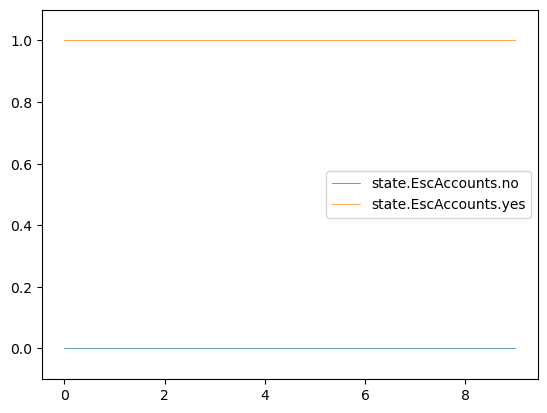

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

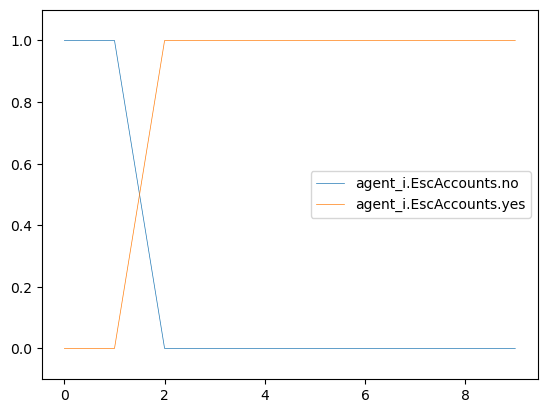

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

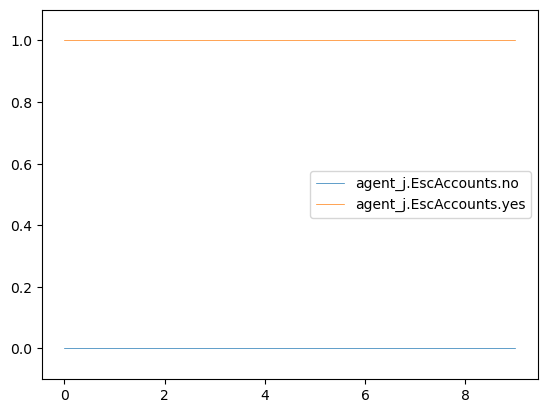

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

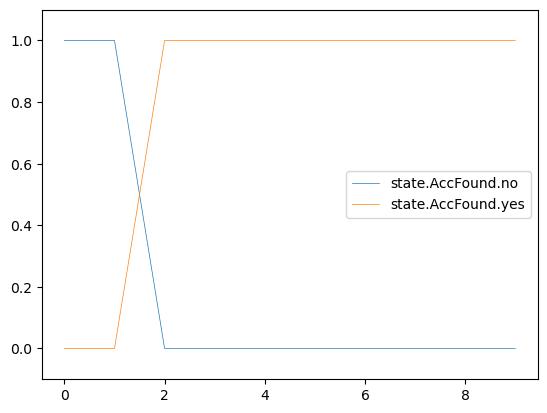

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         2.893001e-06              0.999997               Nop   
6         2.494787e-08              1.000000               Nop   
7         1.542381e-08              1.000000               Nop   
8         5.213705e-09              1.000000               Nop   
9         5.150885e-09              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

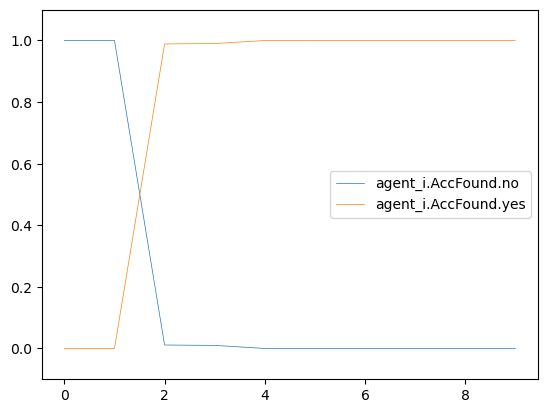

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         3.806757e-07              1.000000  ManipulateData   
5         2.667003e-07              1.000000            Exit   
6         2.667002e-07              1.000000             Nop   
7         2.667003e-07              1.000000             Nop   
8         2.667003e-07              1.000000             Nop   
9         2.667002e-07              1.000000             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

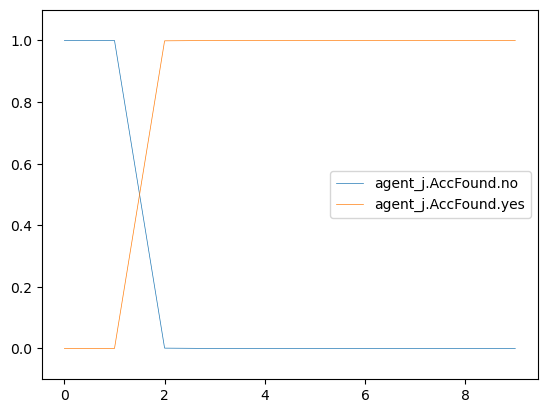

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

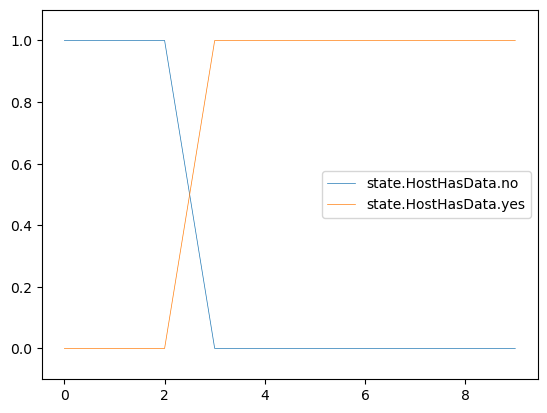

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

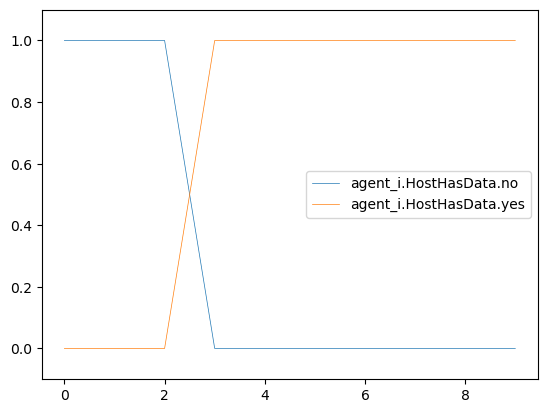

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

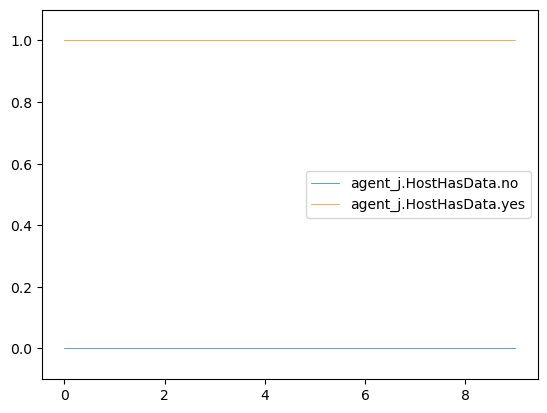

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

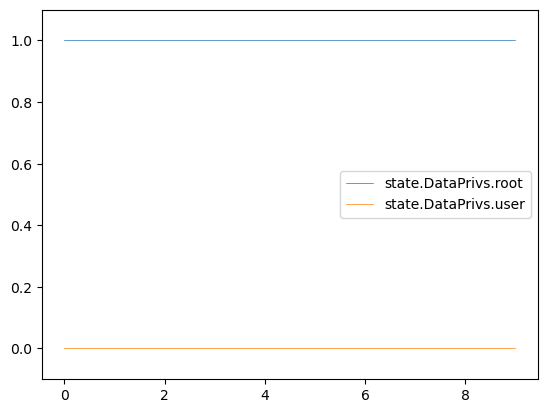

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

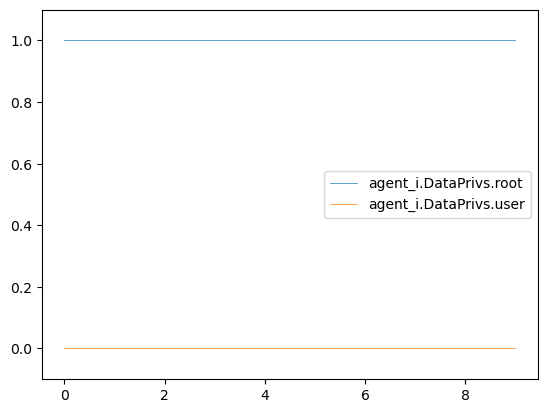

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.775862                0.224138    EnumAccounts   
2                0.775862                0.224138      PrivEscAcc   
3                0.775862                0.224138       FileRecon   
4                0.764463                0.235537  ManipulateData   
5                0.762714                0.237287            Exit   
6                0.762714                0.237287             Nop   
7                0.762714                0.237287             Nop   
8                0.762713                0.237287             Nop   
9                0.762714                0.237287             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

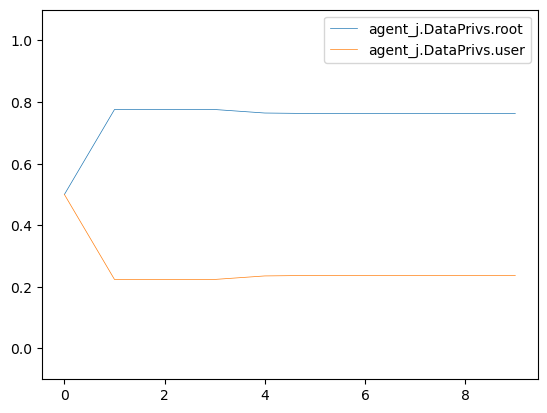

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

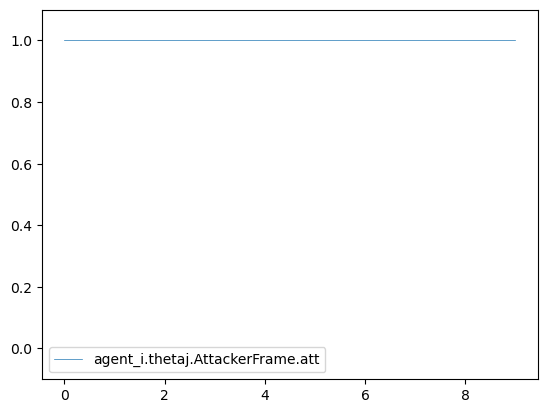

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.411827                        0.588172   
5                         0.333361                        0.666639   
6                         0.411776                        0.588224   
7                         0.411766                        0.588234   
8                         0.411766                        0.588234   
9                         0.411766                        0.588234   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

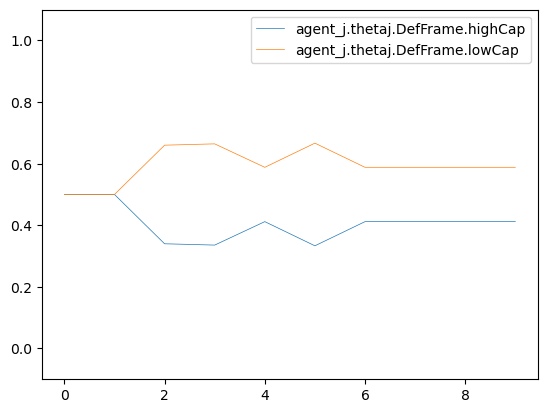

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop       FileRecon  
6                      1.0               Nop  ManipulateData  
7                      1.0               Nop            Exit  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

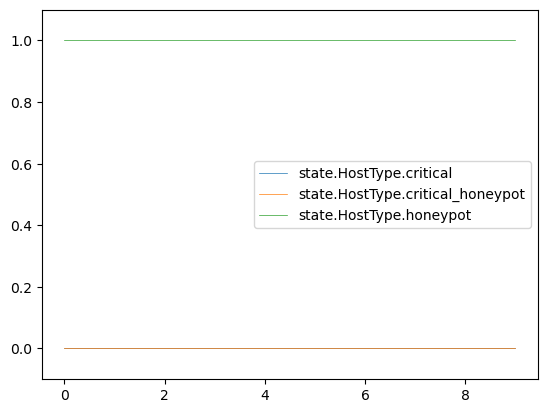

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop       FileRecon   
6                        1.0               Nop  ManipulateData   
7                        1.0               Nop            Exit   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

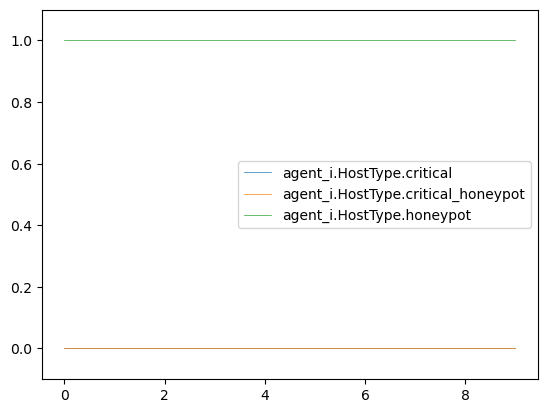

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.176558                                 0.0   
5                   0.333361                                 0.0   
6                   0.176487                                 0.0   
7                   0.176472                                 0.0   
8                   0.176472                                 0.0   
9                   0.176472                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.700000    EnumAccounts      DecoyAccount   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.823442       FileRecon               Nop   
5                   0.666639       FileRecon               Nop   
6                   0.823513  ManipulateData               Nop   
7                   0.823528            Exit               Nop   
8                   0.823528             Nop               Nop   
9                   0.823528             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

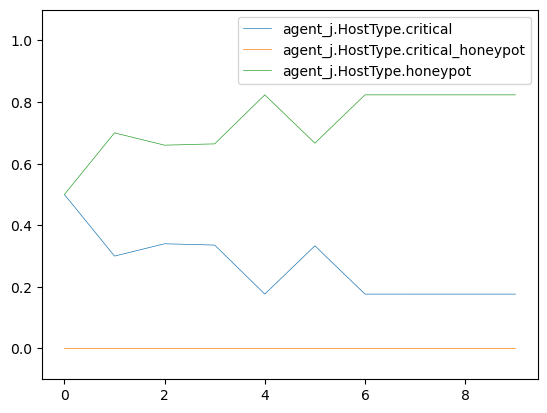

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

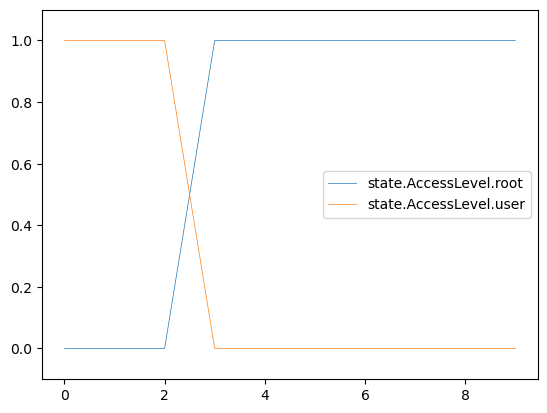

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000              1.000000e+00               Nop   
1                  0.000000              1.000000e+00      DecoyAccount   
2                  0.000000              1.000000e+00  DeployDataDecoys   
3                  0.989987              1.001289e-02               Nop   
4                  0.990000              1.000001e-02               Nop   
5                  0.999962              3.791984e-05               Nop   
6                  0.999839              1.613721e-04               Nop   
7                  0.999980              1.994991e-05               Nop   
8                  1.000000              2.787936e-07               Nop   
9                  1.000000              2.197476e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

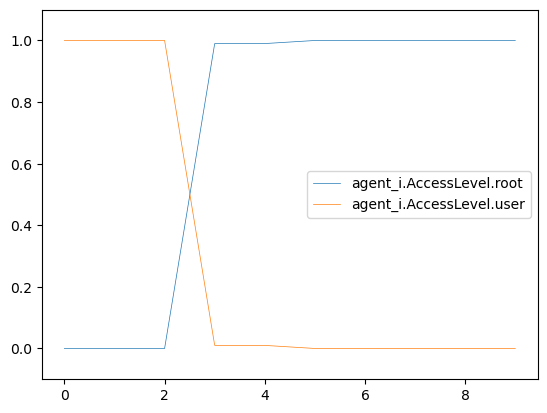

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00       FileRecon   
1                  0.000000              1.000000e+00    EnumAccounts   
2                  0.000000              1.000000e+00      PrivEscAcc   
3                  0.999999              1.123457e-06       FileRecon   
4                  0.999997              3.364138e-06       FileRecon   
5                  0.999986              1.385319e-05       FileRecon   
6                  0.999998              1.893779e-06  ManipulateData   
7                  1.000000              2.030972e-07            Exit   
8                  1.000000              2.030972e-07             Nop   
9                  1.000000              2.030972e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

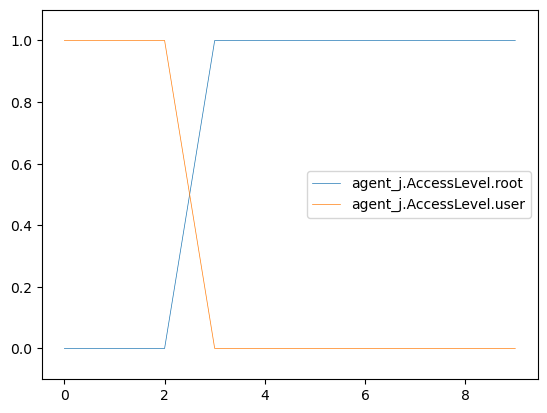

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop       FileRecon
6                 0.0                  1.0               Nop  ManipulateData
7                 0.0                  1.0               Nop            Exit
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

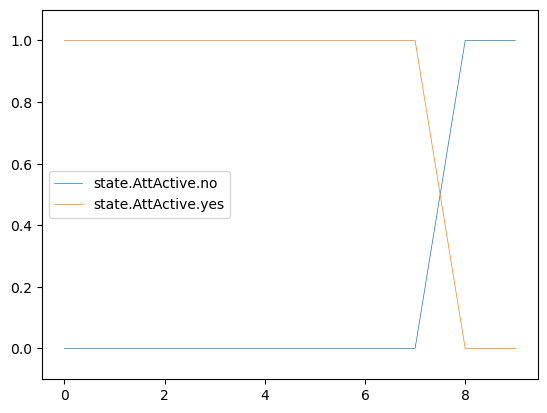

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01               0.500000               Nop   
1          1.020408e-02               0.989796      DecoyAccount   
2          1.179412e-04               0.999882  DeployDataDecoys   
3          1.229218e-06               0.999999               Nop   
4          1.267251e-08               1.000000               Nop   
5          4.933518e-10               1.000000               Nop   
6          1.333520e-03               0.998666               Nop   
7          9.878003e-03               0.990122               Nop   
8          9.997649e-01               0.000235               Nop   
9          9.999973e-01               0.000003               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

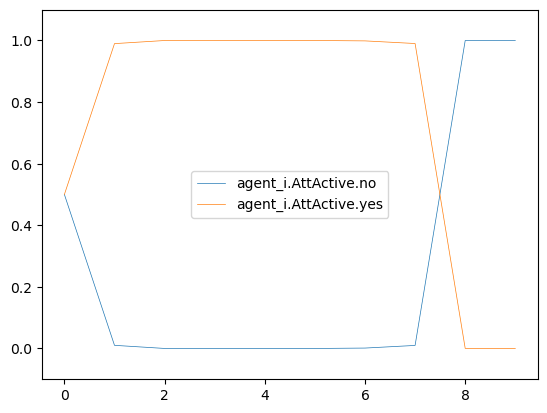

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0       FileRecon   
6                   0.0                    1.0  ManipulateData   
7                   0.0                    1.0            Exit   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

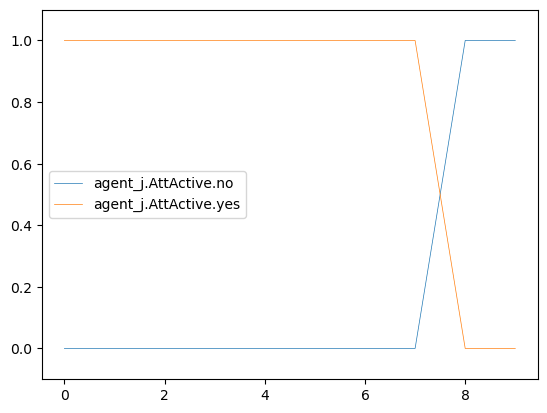

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

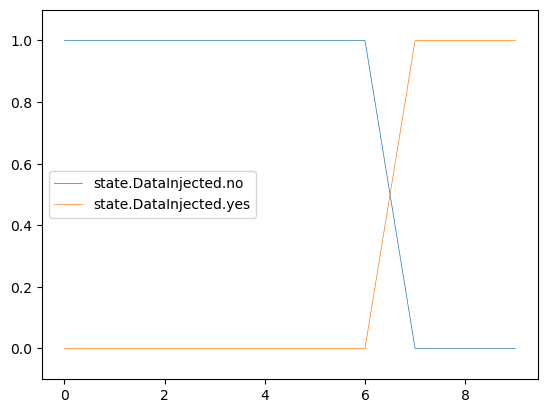

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.972278                  0.027722               Nop   
6                 0.962283                  0.037717               Nop   
7                 0.017058                  0.982942               Nop   
8                 0.000212                  0.999788               Nop   
9                 0.000016                  0.999984               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

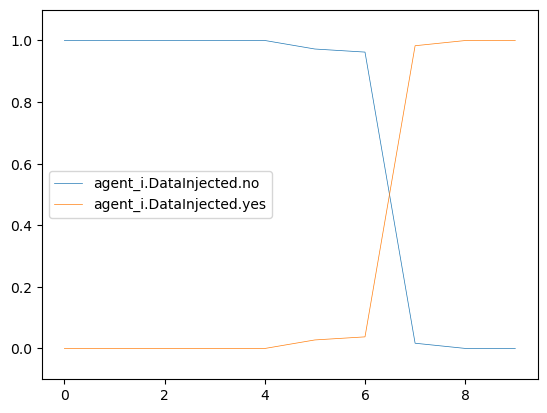

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.000015                  0.999985            Exit   
8                 0.000015                  0.999985             Nop   
9                 0.000015                  0.999985             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

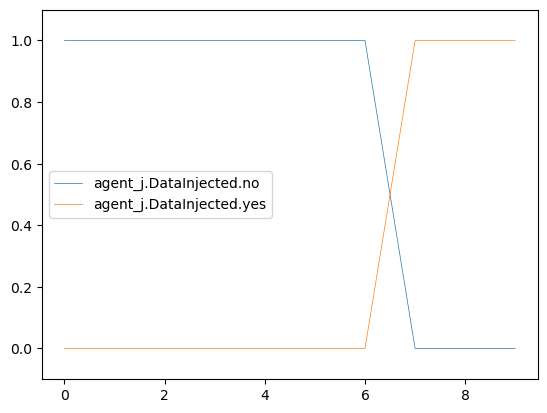

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop       FileRecon
6                 0.0                  1.0               Nop  ManipulateData
7                 0.0                  1.0               Nop            Exit
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

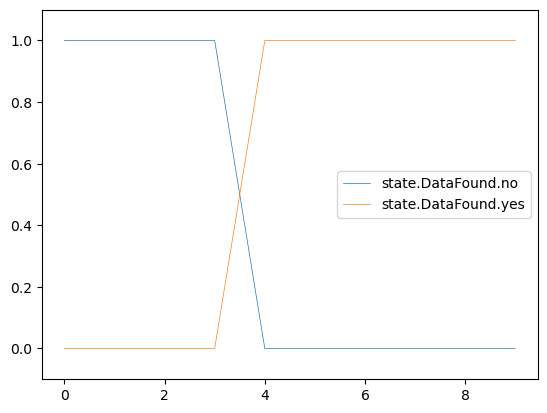

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208792               0.791208               Nop   
5              0.135684               0.864316               Nop   
6              0.114958               0.885042               Nop   
7              0.014855               0.985145               Nop   
8              0.000054               0.999946               Nop   
9              0.000015               0.999985               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

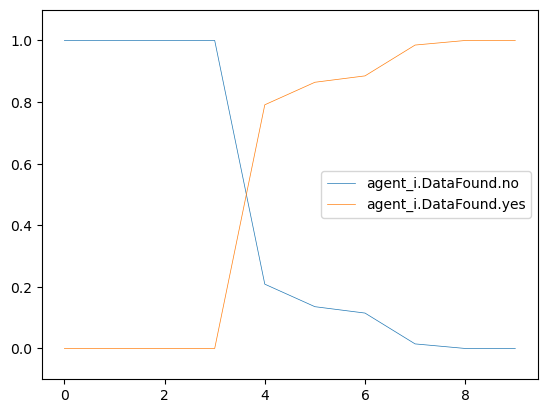

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.931035               0.068966    EnumAccounts   
2              0.931035               0.068966      PrivEscAcc   
3              0.931035               0.068966       FileRecon   
4              0.673131               0.326869       FileRecon   
5              0.583361               0.416639       FileRecon   
6              0.014465               0.985535  ManipulateData   
7              0.000015               0.999985            Exit   
8              0.000015               0.999985             Nop   
9              0.000015               0.999985             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

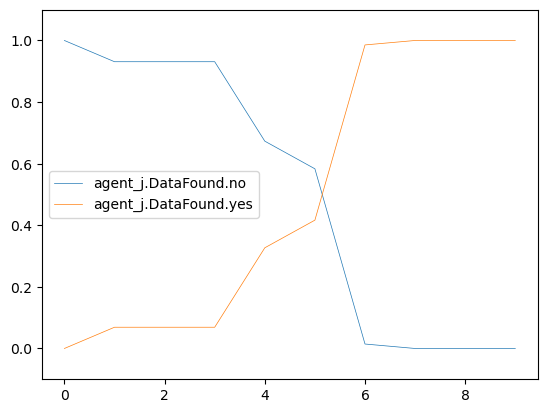

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

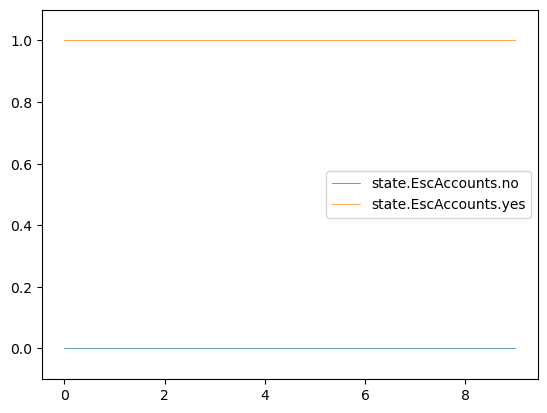

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

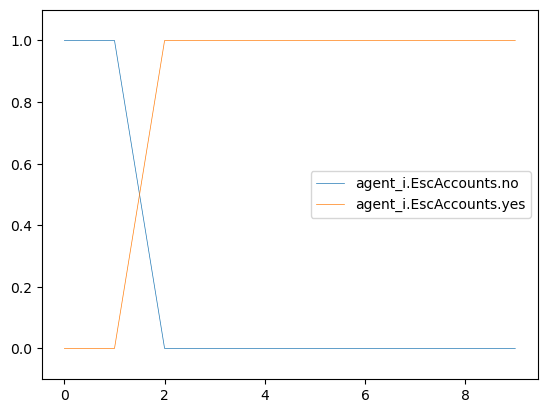

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0       FileRecon   
5                     0.0                      1.0       FileRecon   
6                     0.0                      1.0  ManipulateData   
7                     0.0                      1.0            Exit   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

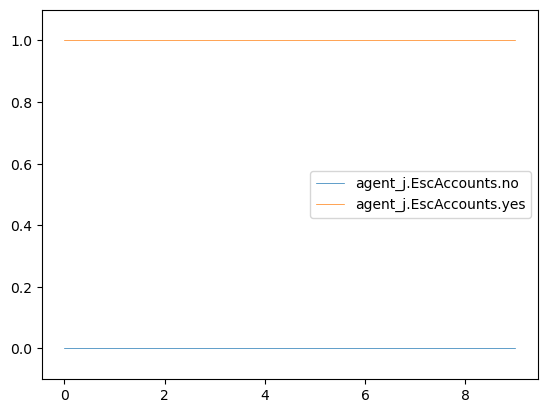

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop       FileRecon
6                0.0                 1.0               Nop  ManipulateData
7                0.0                 1.0               Nop            Exit
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

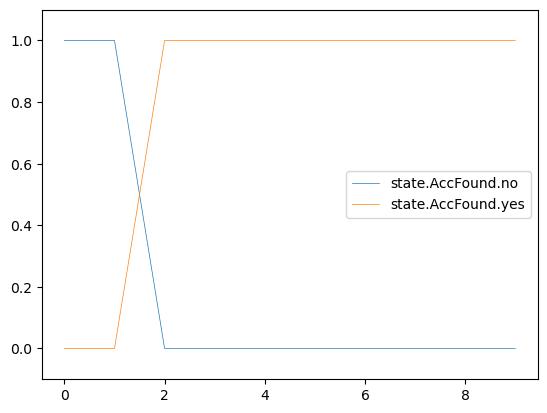

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0         1.000000e+00              0.000000               Nop   
1         1.000000e+00              0.000000      DecoyAccount   
2         1.124935e-02              0.988751  DeployDataDecoys   
3         1.000122e-02              0.989999               Nop   
4         1.099138e-04              0.999890               Nop   
5         3.791530e-05              0.999962               Nop   
6         1.434071e-04              0.999857               Nop   
7         1.994991e-05              0.999980               Nop   
8         2.787628e-07              1.000000               Nop   
9         2.197476e-08              1.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

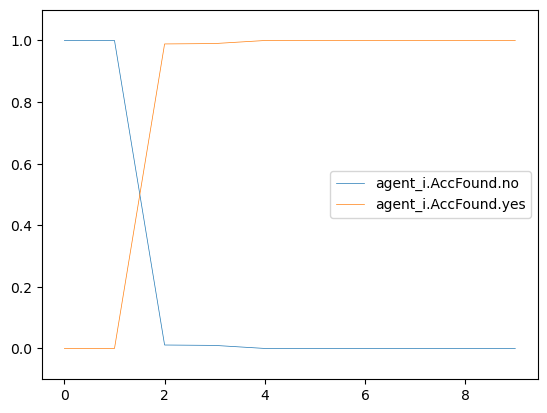

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000       FileRecon   
1         1.000000e+00              0.000000    EnumAccounts   
2         1.121076e-03              0.998879      PrivEscAcc   
3         1.123457e-06              0.999999       FileRecon   
4         3.364138e-06              0.999997       FileRecon   
5         1.385319e-05              0.999986       FileRecon   
6         1.893779e-06              0.999998  ManipulateData   
7         2.030972e-07              1.000000            Exit   
8         2.030972e-07              1.000000             Nop   
9         2.030972e-07              1.000000             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

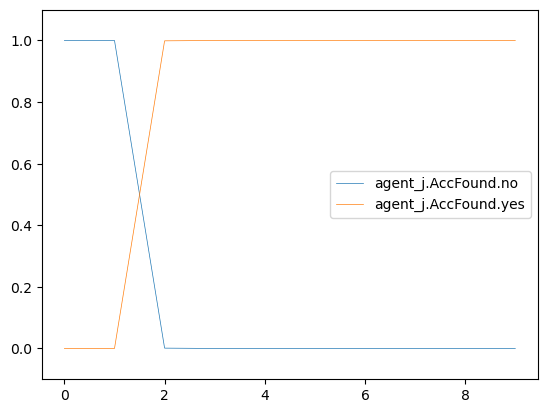

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0      DecoyAccount   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

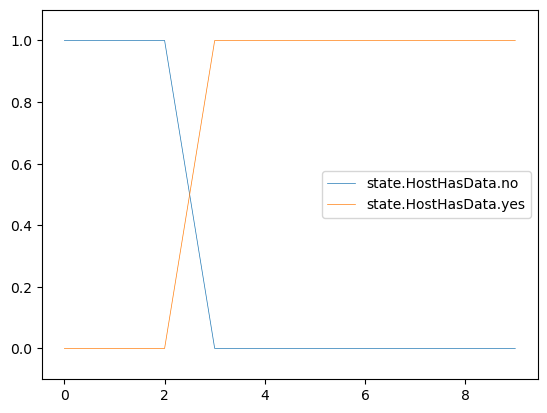

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0      DecoyAccount   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

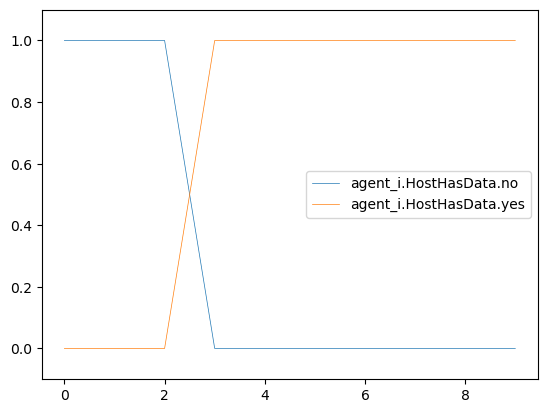

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                     0.0                      1.0       FileRecon   
1                     0.0                      1.0    EnumAccounts   
2                     0.0                      1.0      PrivEscAcc   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0       FileRecon   
5                     0.0                      1.0       FileRecon   
6                     0.0                      1.0  ManipulateData   
7                     0.0                      1.0            Exit   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

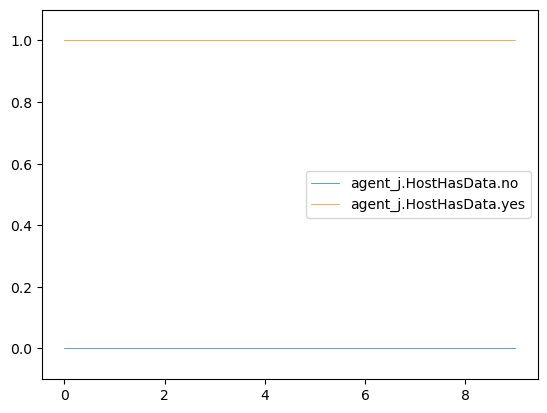

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

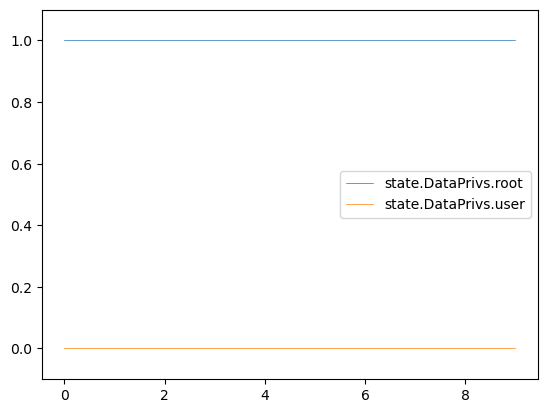

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

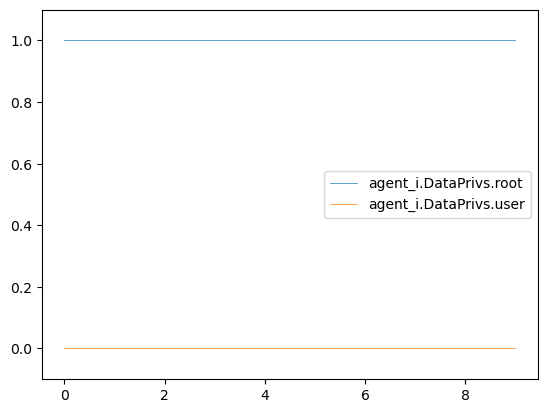

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.775862                0.224138    EnumAccounts   
2                0.775862                0.224138      PrivEscAcc   
3                0.775862                0.224138       FileRecon   
4                0.810250                0.189750       FileRecon   
5                0.822222                0.177778       FileRecon   
6                0.820933                0.179067  ManipulateData   
7                0.820751                0.179249            Exit   
8                0.820751                0.179249             Nop   
9                0.820751                0.179249             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1      DecoyAccount                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

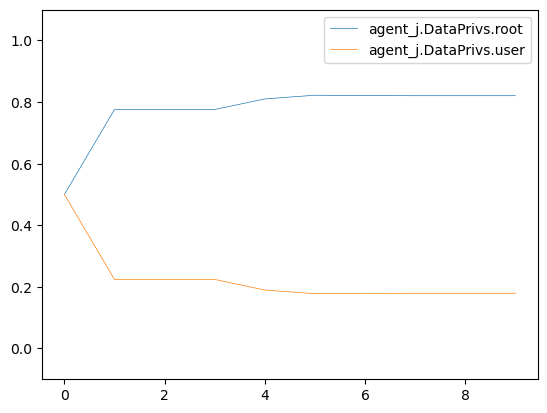

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    